## BirdsEye results user guide

By default, experiment logs will be stored in the `./runs` directory. 

Depending on the motion planning method used, the logs will be separated into subdirectories `./runs/mcts` and `./runs/dqn`

Every experiment will have 2 log files associated with it.  
They are saved in the format `%Y-%m-%dT%H:%M:%S_header.txt` and `%Y-%m-%dT%H:%M:%S_data.csv` where `%Y-%m-%dT%H:%M:%S` is a timestamp denoting when the experiment was started.

The `%Y-%m-%dT%H:%M:%S_header.txt` files contain a dictionary of the settings used to run the experiment. 

The `%Y-%m-%dT%H:%M:%S_data.csv` files contain a table of metrics, and state information saved from the experiment.

In [1]:
import matplotlib.pyplot as plt
import pprint
from birdseye.results import * 
from datetime import datetime

To easily view the results from specific experiments we have written the `filter_runs(method, filter)` function, which accepts a a motion planning method and a dictionary.  
The dictionary is used to filter experiments by specific config settings.  
For instance you can filter by `datetime_start`, `datetime_end`, `reward`, `sensor` and others.

The `filter_runs()` function will return a list of experiment names (starting timestamp) which can then be used to access the specific experiment config (using `get_config(method, run)`) and log data (using `get_data(method, run)`).

In [2]:
import itertools




In [3]:

def experiments_status(): 
    # sensor (doublerssi)
    # method type (dqn, mcts)
    # reward (range_reward, entropy_collision_reward)
    # fading_sigma (0,2,4)
    # resample_proportion (0.005, 0.01)
    
    sensors = ['doublerssi']
    methods = ['mcts','dqn']
    rewards = ['range_reward','entropy_collision_reward']
    fading_sigmas = [ 2,4,8]
    particle_resample_rates = [0.01]

    experiment_list = list(itertools.product(sensors, methods, rewards, fading_sigmas, particle_resample_rates))
    for exp in experiment_list: 
        run_filter = {}
        run_filter['sensor'] = exp[0]
        run_filter['reward'] = exp[2]
        run_filter['fading_sigma'] = exp[3]
        run_filter['particle_resample'] = exp[4]
        runs = filter_runs(exp[1], run_filter)
        runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        print('method = {}'.format(exp[1]))
        print('reward = {}'.format(run_filter['reward']))
        print('fading_simga = {}'.format(run_filter['fading_sigma']))
        print('particle_resample = {}'.format(run_filter['particle_resample']))
        print(len(runs))
        if len(runs) == 0: 
            print('MISSING EXPERIMENT!!!')
        print('========================')
experiments_status()

method = mcts
reward = range_reward
fading_simga = 2
particle_resample = 0.01
1
method = mcts
reward = range_reward
fading_simga = 4
particle_resample = 0.01
1
method = mcts
reward = range_reward
fading_simga = 8
particle_resample = 0.01
1
method = mcts
reward = entropy_collision_reward
fading_simga = 2
particle_resample = 0.01
1
method = mcts
reward = entropy_collision_reward
fading_simga = 4
particle_resample = 0.01
1
method = mcts
reward = entropy_collision_reward
fading_simga = 8
particle_resample = 0.01
0
MISSING EXPERIMENT!!!
method = dqn
reward = range_reward
fading_simga = 2
particle_resample = 0.01
1
method = dqn
reward = range_reward
fading_simga = 4
particle_resample = 0.01
1
method = dqn
reward = range_reward
fading_simga = 8
particle_resample = 0.01
1
method = dqn
reward = entropy_collision_reward
fading_simga = 2
particle_resample = 0.01
1
method = dqn
reward = entropy_collision_reward
fading_simga = 4
particle_resample = 0.01
1
method = dqn
reward = entropy_collision_rew

In [62]:

def conv_shape(in_len, kernel=1, padding=0, stride=1, dilation=1):
    return int((in_len + 2*padding - dilation*(kernel - 1) - 1)/stride + 1)


print(conv_shape(3, kernel=3, padding=1))

3


In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':0 }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.01 }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

In [8]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.01,}
baseline_runs = filter_runs('baseline', run_filter)
print(baseline_runs)
print(get_config('baseline', baseline_runs[0]))

['2022-04-04T11:44:09', '2022-04-04T11:44:29']
{'Methods': {'env': 'RFMultiEnv', 'method': 'baseline', 'action': 'baselineactions', 'sensor': 'doublerssi', 'state': 'rfmultistate', 'target_speed': '1.0', 'target_start': '100', 'fading_sigma': '2', 'particle_resample': '0.01', 'particle_min': '10', 'particle_max': '200', 'plotting': 'False', 'trials': '500', 'timesteps': '150', 'reward': 'range_reward'}, 'Defaults': {'policy': 'static', 'plotting': 'False', 'trials': '500', 'timesteps': '150'}}


In [4]:
config = get_config('mcts', mcts_runs[0])
data = get_data('mcts', mcts_runs[0])

print('Run: {}'.format(mcts_runs[0]))
print('\nConfig: ')
pprint.pprint(config)
print('\nLog metrics and state information:')
pprint.pprint(list(data.columns.values))


NameError: name 'mcts_runs' is not defined

In [ ]:
np.array(eval(data['pf_cov'][0])).shape

In [ ]:
data['pf_cov'][0]

In [ ]:
data = get_data('mcts', mcts_runs[0])
r, theta = mean_std_dev(data['pf_cov'])

In [ ]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.005, 'reward':'range_reward', 'fading_sigma':2 }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
# print(mcts_runs)
# print(dqn_runs)
mcts_data = get_data('mcts', mcts_runs[0])
dqn_data = get_data('dqn', dqn_runs[0])
mcts_avg_inference_time = np.mean(list(mcts_data['inference_times'].apply(lambda x: [float(xx) for xx in re.split(', |\s+', x[1:-1]) if len(xx) > 0])))
dqn_avg_inference_time = np.mean(list(dqn_data['inference_times'].apply(lambda x: [float(xx) for xx in re.split(', |\s+', x[1:-1]) if len(xx) > 0])))
print(mcts_avg_inference_time)
print(dqn_avg_inference_time)
print(mcts_avg_inference_time/dqn_avg_inference_time)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.005, 'reward':'entropy_collision_reward', 'fading_sigma':2 }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
# print(mcts_runs)
# print(dqn_runs)
mcts_data = get_data('mcts', mcts_runs[0])
dqn_data = get_data('dqn', dqn_runs[0])
mcts_avg_inference_time = np.mean(list(mcts_data['inference_times'].apply(lambda x: [float(xx) for xx in re.split(', |\s+', x[1:-1]) if len(xx) > 0])))
dqn_avg_inference_time = np.mean(list(dqn_data['inference_times'].apply(lambda x: [float(xx) for xx in re.split(', |\s+', x[1:-1]) if len(xx) > 0])))
print(mcts_avg_inference_time)
print(dqn_avg_inference_time)
print(mcts_avg_inference_time/dqn_avg_inference_time)

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(r)
ax2.plot(theta)

In [9]:
def doublerssi_std_dev(run_filter): 
    
    mcts_runs = filter_runs('mcts', run_filter)
    mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
    

    mcts_data = get_data('mcts', mcts_runs[0])


    #assert mcts_data.shape[0] == dqn_data.shape[0]
    mcts_std_dev_r, mcts_std_dev_theta = mean_std_dev(mcts_data['pf_cov'])
    

    fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
    ax1.plot(mcts_std_dev_r, color='blue', marker='x', markevery=10, label='MCTS')
    #ax1.set_xlabel('timestep')
    ax1.set_ylabel(r'$\sigma_r$')
    ax1.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax1.grid( linestyle = '--', linewidth = 1)
    
    #fig, ax = plt.subplots(122)
    ax2.plot(mcts_std_dev_theta, color='blue', marker='x', markevery=10, label='MCTS')
    ax2.set_xlabel('timestep')
    ax2.set_ylabel(r'$\sigma_{{\theta}}$')
    ax2.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax2.grid( linestyle = '--', linewidth = 1)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.01, 'fading_sigma':2 }
doublerssi_std_dev(run_filter)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.01,'reward':'range_reward', 'fading_sigma':4 }
doublerssi_std_dev(run_filter)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'particle_resample':0.01, 'reward':'entropy_collision_reward', 'fading_sigma':4 }
doublerssi_std_dev(run_filter)

In [65]:
def mean_std_dev(data): 

    cov = []
    for n in range(data.shape[0]): 
        cov.append(np.array(eval(data[n])))
    cov = np.array(cov)
    cov = cov.reshape(cov.shape[0], cov.shape[1], 8, 8)
    
    mean_cov = np.mean(cov, axis=0)
    
    std_dev_r = np.sqrt((mean_cov[:,0,0]+mean_cov[:,4,4])/2)
    std_dev_theta = np.sqrt((mean_cov[:,1,1]+mean_cov[:,5,5])/2)
    
    return std_dev_r, std_dev_theta

def doublerssi_std_dev_comparison(run_filter): 
    
    mcts_runs = filter_runs('mcts', run_filter)
    mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
    dqn_runs = filter_runs('dqn', run_filter)
    dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

    mcts_data = get_data('mcts', mcts_runs[0])
    dqn_data = get_data('dqn', dqn_runs[0])


    #assert mcts_data.shape[0] == dqn_data.shape[0]
    mcts_std_dev_r, mcts_std_dev_theta = mean_std_dev(mcts_data['pf_cov'])
    dqn_std_dev_r, dqn_std_dev_theta = mean_std_dev(dqn_data['pf_cov'])
    

    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,6), dpi=300, sharex=True)
    ax1.plot(mcts_std_dev_r, color='blue', marker='x', linestyle='--', markevery=10, label='MCTS')
    ax1.plot(dqn_std_dev_r, color='green', marker='D', markevery=10, label='DQN')
    #ax1.set_xlabel('timestep')
    ax1.set_ylabel(r'$\sigma_d$')
    #ax1.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax1.grid( linestyle = '--', linewidth = 1)
    
    #fig, ax = plt.subplots(122)
    ax2.plot(mcts_std_dev_theta, color='blue', marker='x', linestyle='--', markevery=10, label='MCTS')
    ax2.plot(dqn_std_dev_theta, color='green', marker='D', markevery=10, label='DQN')
    ax2.set_xlabel('Timestep (s)')
    ax2.set_ylabel(r'$\sigma_{{\theta}}$')
    #ax2.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax2.grid( linestyle = '--', linewidth = 1)
    ax2.legend(loc='center left', bbox_to_anchor=(1.0,1.1), fancybox=True, shadow=True,)
    #fig.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)

def doublerssi_std_dev_reward_comparison(run_filter): 
    baseline_filter = run_filter.copy()
    baseline_filter['policy'] = 'random'
    baseline_filter.pop('reward', None)
    baseline_runs = filter_runs('baseline', baseline_filter)
    baseline_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
    baseline_data = get_data('baseline', baseline_runs[0])
    baseline_std_dev_r, baseline_std_dev_theta = mean_std_dev(baseline_data['pf_cov'])
    baseline_datas = []
    baseline_datas.append([baseline_std_dev_r, baseline_std_dev_theta])
    
    mcts_datas = []
    dqn_datas = []
    rewards = ['entropy_collision_reward', 'range_reward']
    for reward in rewards: 
        run_filter['reward'] = reward
        
        mcts_runs = filter_runs('mcts', run_filter)
        mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        dqn_runs = filter_runs('dqn', run_filter)
        dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        
        mcts_data = get_data('mcts', mcts_runs[0])
        dqn_data = get_data('dqn', dqn_runs[0])
        
        #assert mcts_data.shape[0] == dqn_data.shape[0]
        mcts_std_dev_r, mcts_std_dev_theta = mean_std_dev(mcts_data['pf_cov'])
        dqn_std_dev_r, dqn_std_dev_theta = mean_std_dev(dqn_data['pf_cov'])
        
        mcts_datas.append([mcts_std_dev_r,mcts_std_dev_theta])
        dqn_datas.append([dqn_std_dev_r, dqn_std_dev_theta])
        
    ###

    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,8), dpi=300, sharex=True)
    ax1.set_prop_cycle('color',plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:])
    ax2.set_prop_cycle('color',plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:])

    ax1.plot(baseline_datas[0][0], marker='x', linestyle='--', markevery=10, label='$Baseline$')
    ax2.plot(baseline_datas[0][1], marker='x', linestyle='--', markevery=10, label='$Baseline$')
    
    reward_label = {'entropy_collision_reward':'entropy', 'range_reward':'heuristic'}
    for i,reward in enumerate(rewards):     
        ax1.plot(mcts_datas[i][0], marker='x', linestyle='--', markevery=10, label='$MCTS, r_{{{}}}$'.format(reward_label[reward]))
    for i,reward in enumerate(rewards):     
        ax2.plot(mcts_datas[i][1], marker='x', linestyle='--', markevery=10, label='$MCTS, r_{{{}}}$'.format(reward_label[reward]))
    for i,reward in enumerate(rewards):     
        ax1.plot(dqn_datas[i][0], marker='D', markevery=10, label='$DQN, r_{{{}}}$'.format(reward_label[reward]))
    for i,reward in enumerate(rewards): 
        ax2.plot(dqn_datas[i][1], marker='D', markevery=10, label='$DQN, r_{{{}}}$'.format(reward_label[reward]))
    #ax1.set_xlabel('timestep')
    ax1.set_ylabel(r'$\sigma_d$', fontsize=12)
    #ax1.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax1.grid( linestyle = '--', linewidth = 1)
    ax2.set_xlabel('Timestep (s)')
    ax2.set_ylabel(r'$\sigma_{{\theta}}$', fontsize=12)
    #ax2.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax2.grid( linestyle = '--', linewidth = 1)
    #ax2.legend(loc='center left', bbox_to_anchor=(1.0,1.1), fancybox=True, shadow=True,)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    #fig.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)

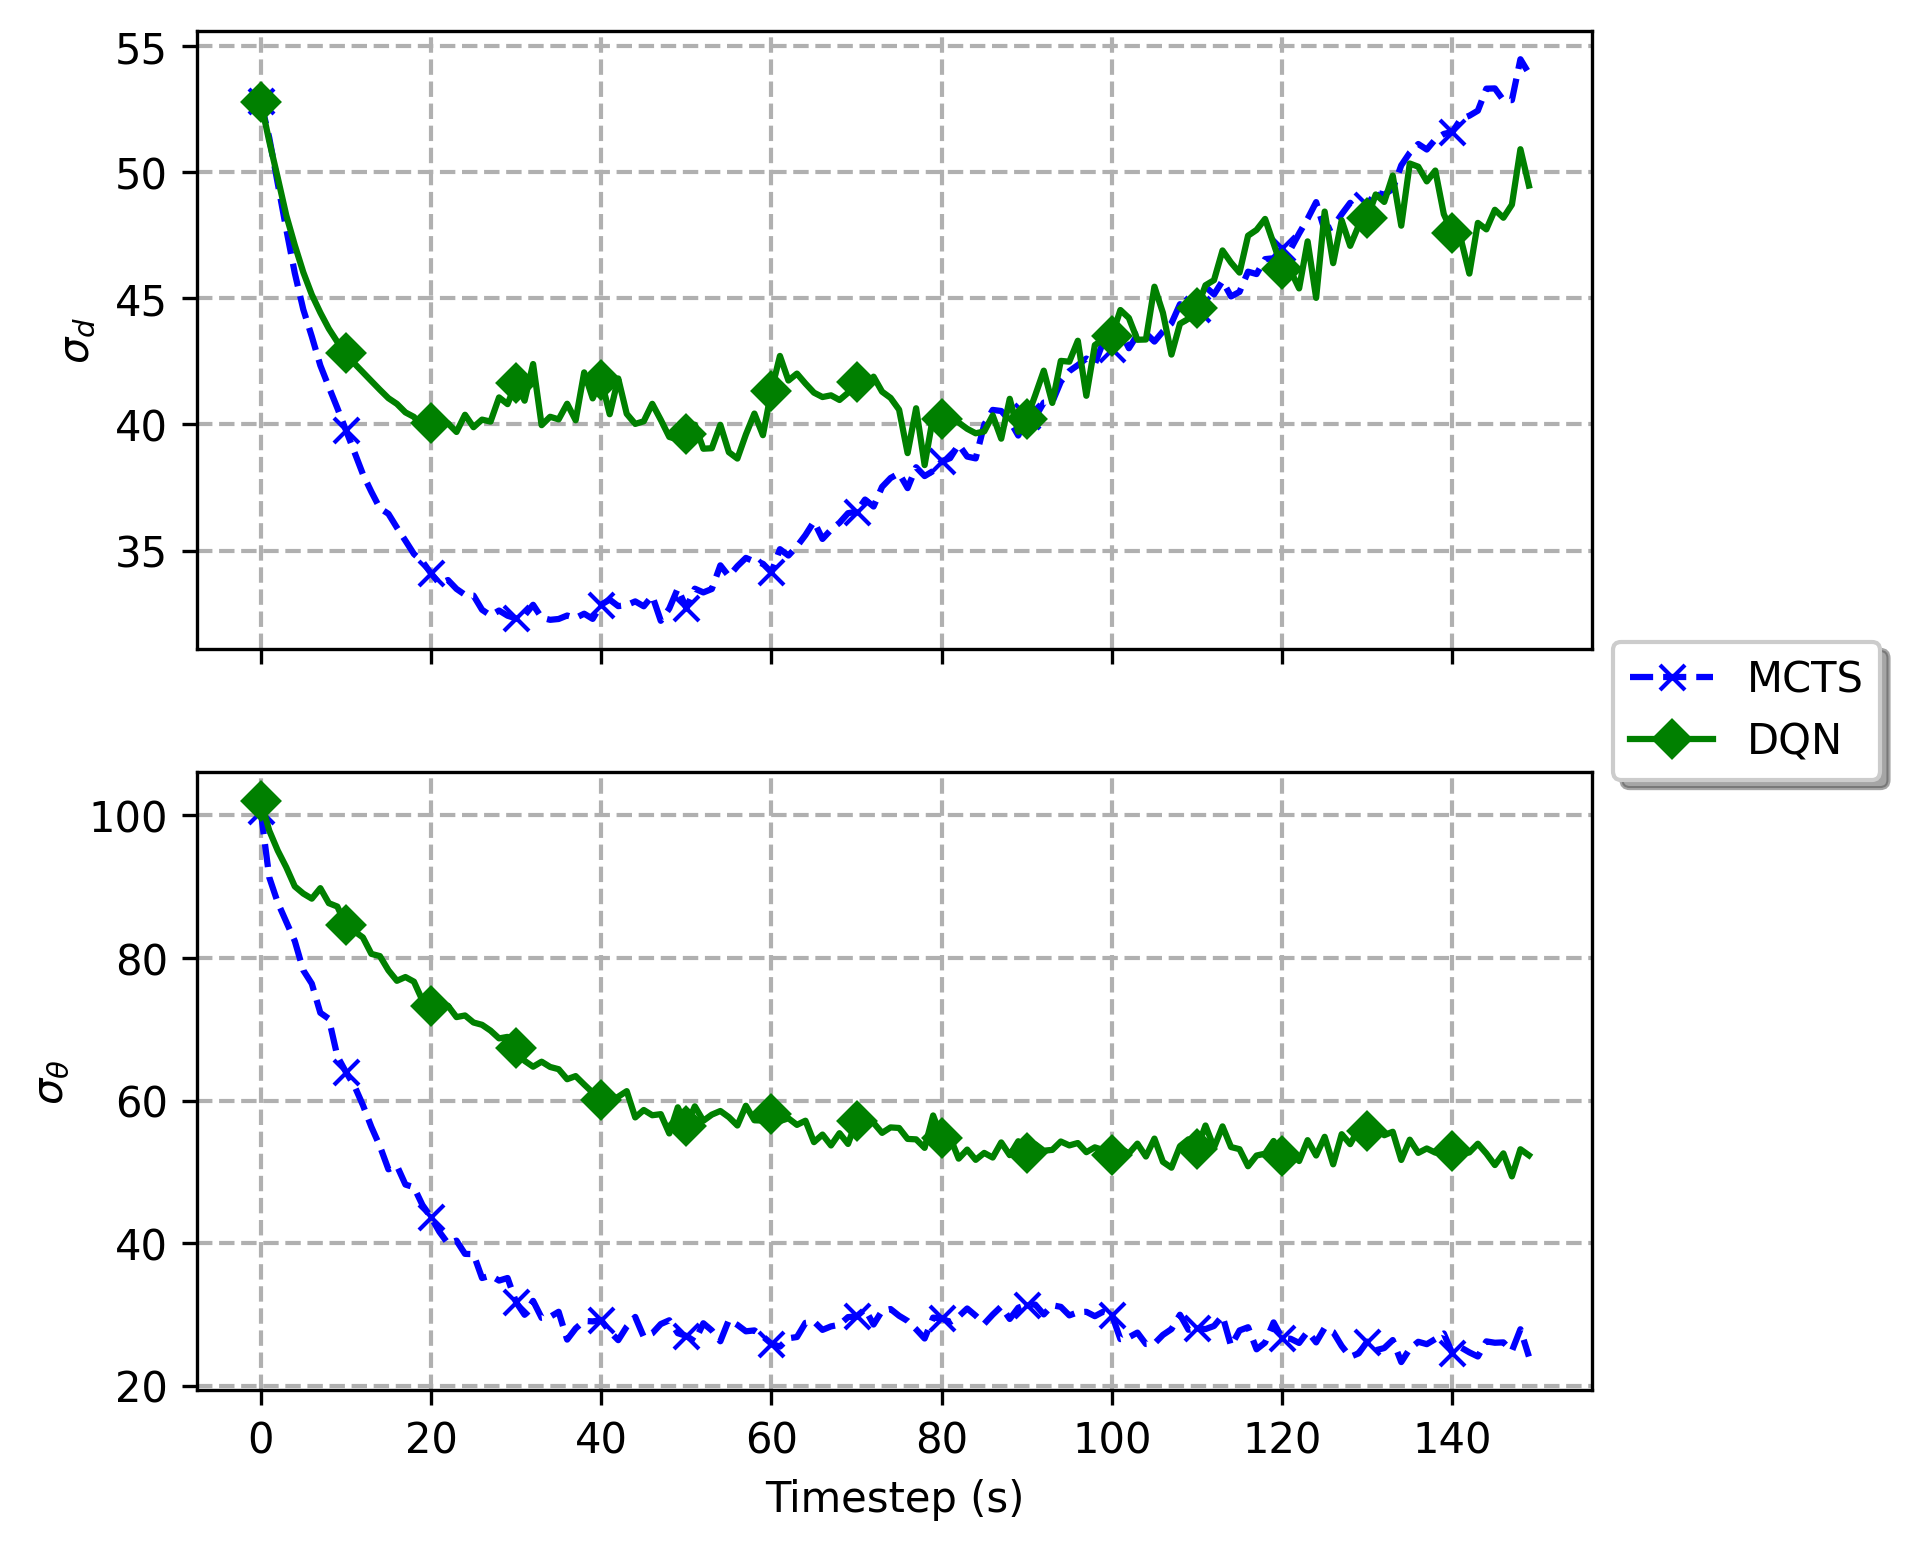

In [41]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward', 'fading_sigma':2 }
doublerssi_std_dev_comparison(run_filter)

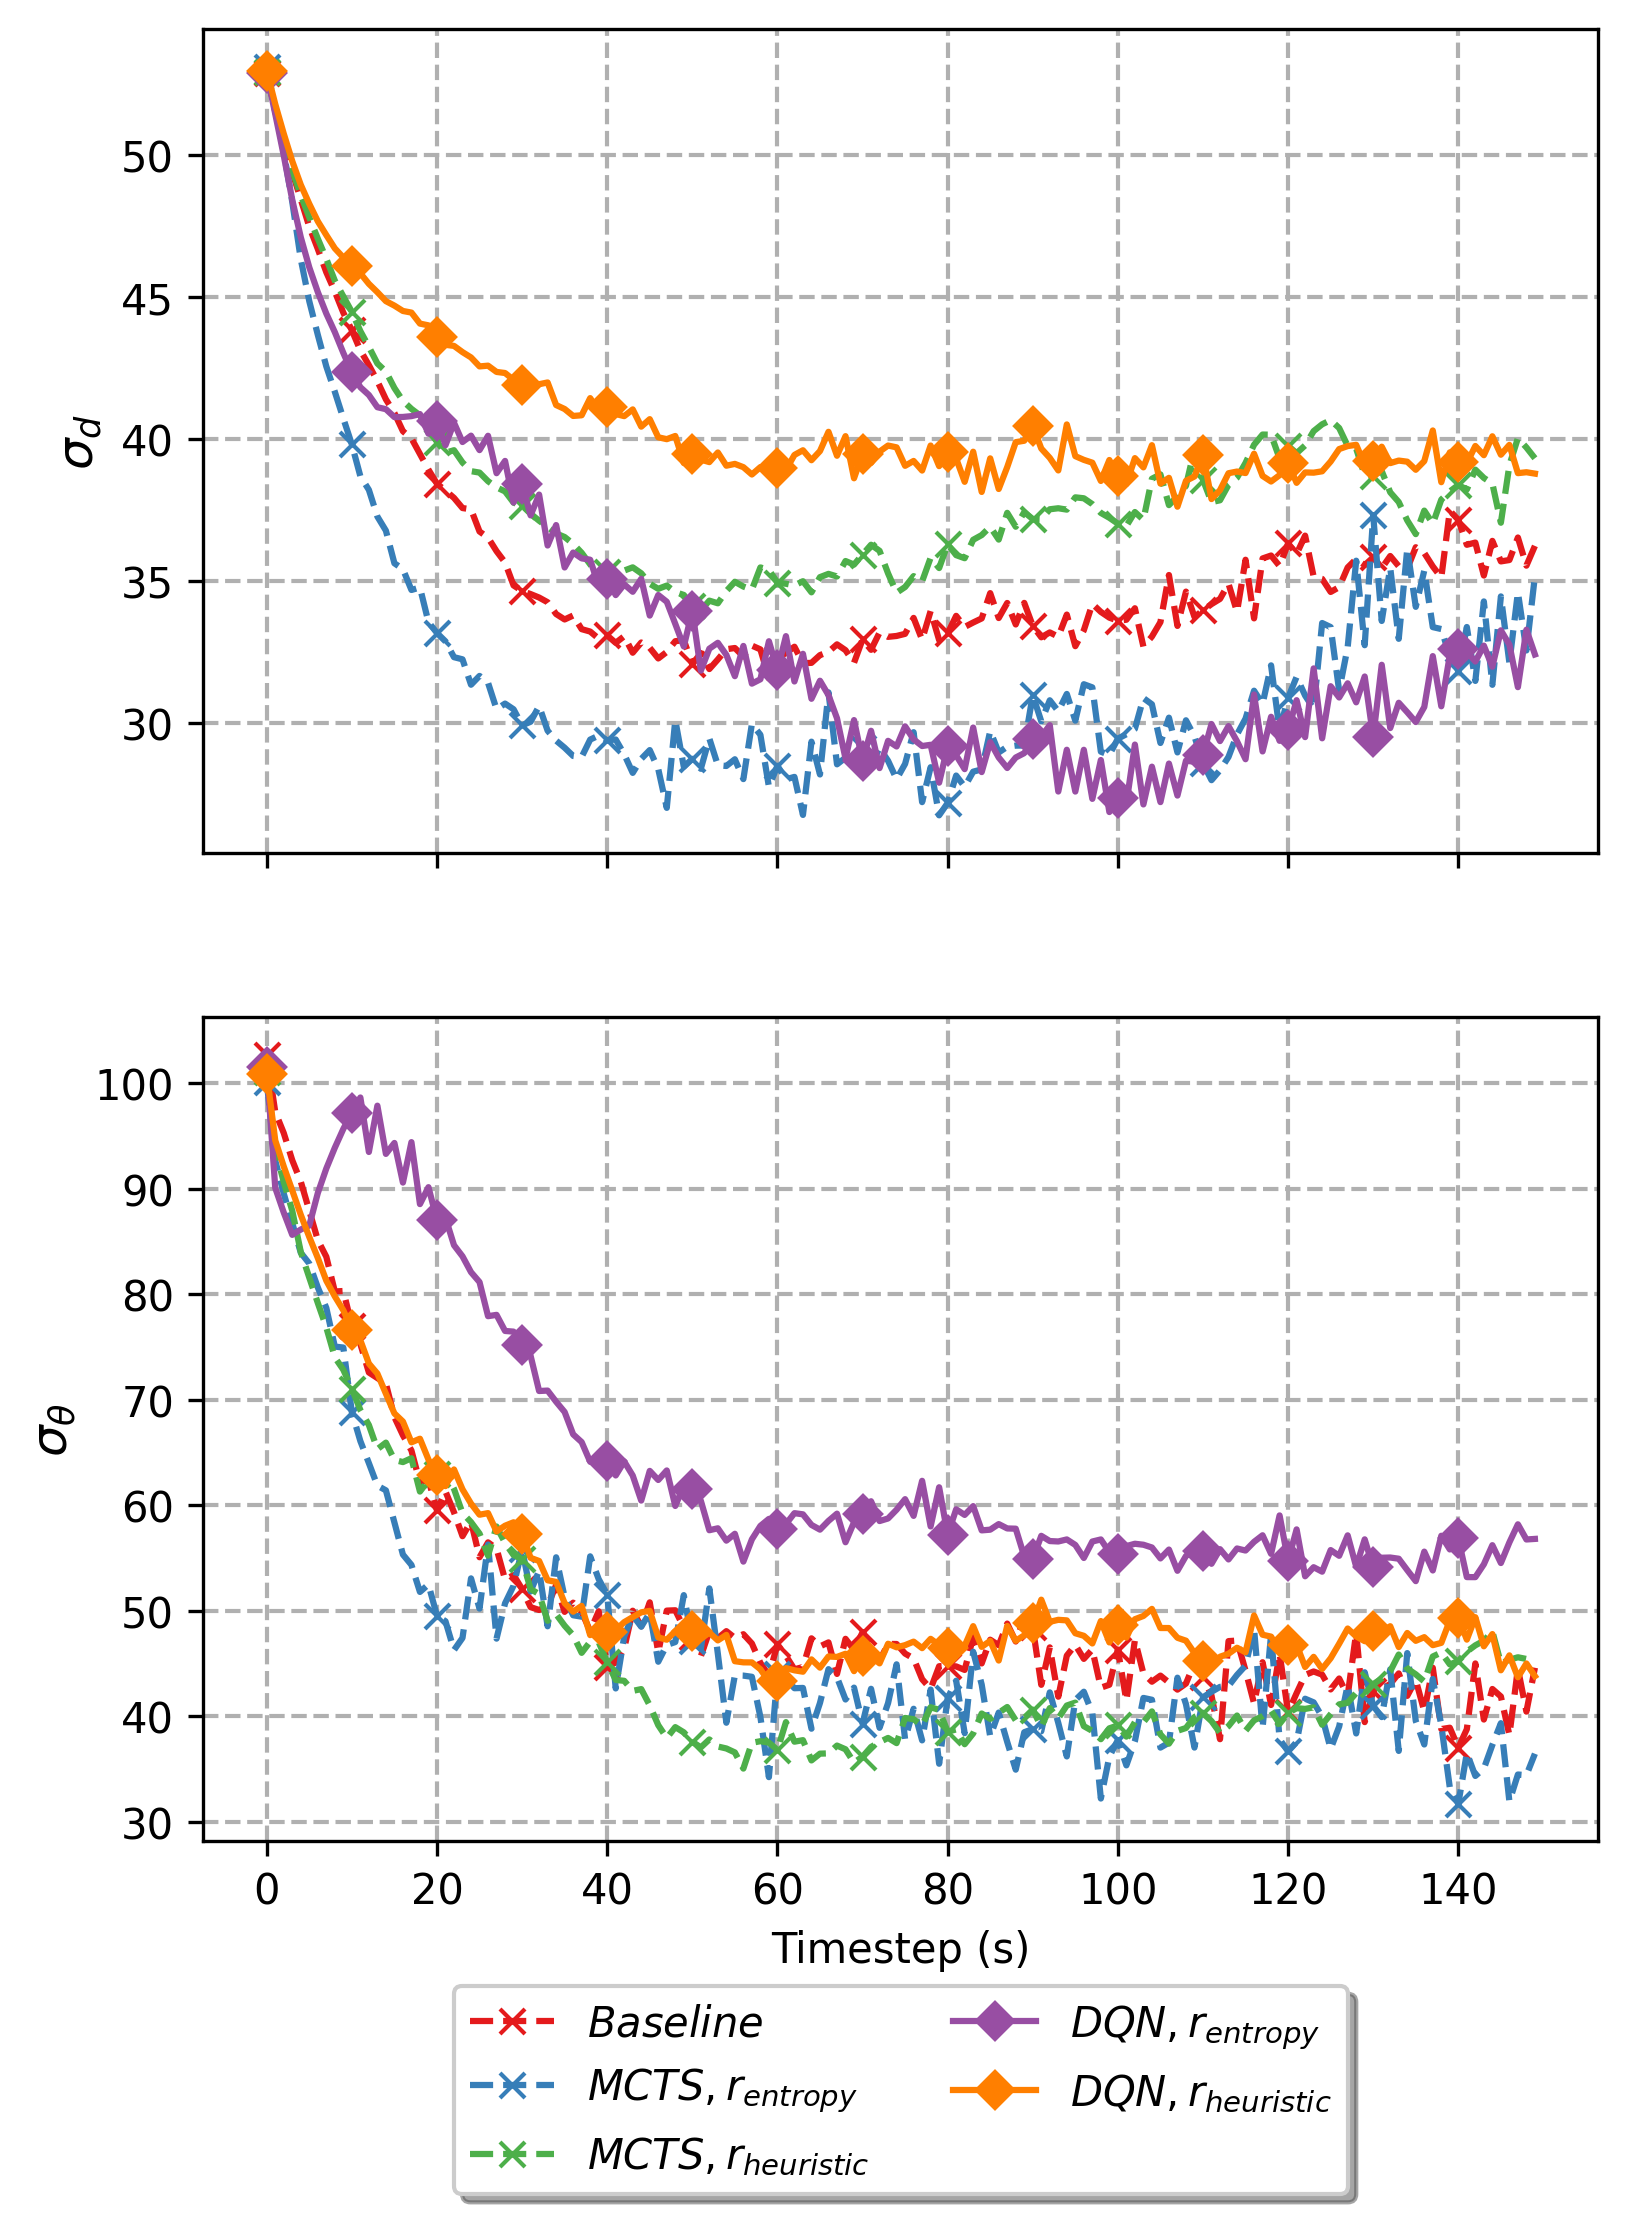

In [70]:
### FIGURE
run_filter = {'sensor': 'doublerssi',  'fading_sigma':4 }

doublerssi_std_dev_reward_comparison(run_filter)

In [67]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':8 }

doublerssi_std_dev_reward_comparison(run_filter)

IndexError: list index out of range

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward', 'fading_sigma':4 }
doublerssi_std_dev_comparison(run_filter)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward', 'fading_sigma':2 }
doublerssi_std_dev_comparison(run_filter)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'fading_sigma':8 }
doublerssi_std_dev_comparison(run_filter)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'fading_sigma':2 }
doublerssi_std_dev_comparison(run_filter)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'fading_sigma':4 }
doublerssi_std_dev_comparison(run_filter)

In [174]:
def mean_metric(data): 
    n_runs = data.shape[0]
    
    mean_metric = []
    for n in range(n_runs): 
        a = re.split(',', re.sub('[\n]+', ',', data[n]))
        b = [re.sub('[\[\]]+', '', aa).strip() for aa in a]
        c = [re.split('\s+', bb) for bb in b ]
        d = [[float(ccc) for ccc in cc] for cc in c]
        d = np.mean(d, axis=1)
        mean_metric.append(d)
    mean_metric = np.array(mean_metric)
    mean_metric = np.mean(mean_metric, axis=0)    
    return mean_metric

def doublerssi_mean_metric_comparison(run_filter, metric): 
    
    mcts_runs = filter_runs('mcts', run_filter)
    mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
    dqn_runs = filter_runs('dqn', run_filter)
    dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

    mcts_data = get_data('mcts', mcts_runs[0])
    dqn_data = get_data('dqn', dqn_runs[0])


    #assert mcts_data.shape[0] == dqn_data.shape[0]
    
    mcts_mean = mean_metric(mcts_data[metric])
    dqn_mean = mean_metric(dqn_data[metric])
    

    fig, ax = plt.subplots()
    ax.plot(mcts_mean, color='blue', marker='x', markevery=10, label='MCTS')
    ax.plot(dqn_mean, color='green', marker='D', markevery=10, label='DQN')
    ax.set_xlabel('timestep')
    ax.set_ylabel(metric)
    ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax.grid( linestyle = '--', linewidth = 1)
    
def doublerssi_mean_metric_sigma_comparison(run_filter, metric, sigmas): 
    
    baseline_datas = []
    mcts_datas = []
    dqn_datas = []
    for sigma in sigmas: 
        run_filter['fading_sigma'] = sigma
        
        baseline_filter = run_filter.copy()
        baseline_filter['policy'] = 'static'
        baseline_runs = filter_runs('baseline', baseline_filter)
        baseline_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        
        
        baseline_data = get_data('baseline', baseline_runs[0])
        
        

        #assert mcts_data.shape[0] == dqn_data.shape[0]

        baseline_mean = mean_metric(baseline_data[metric])
        baseline_datas.append(baseline_mean)
        
        
        try: 
            mcts_runs = filter_runs('mcts', run_filter)
            mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
            mcts_data = get_data('mcts', mcts_runs[0])
            mcts_mean = mean_metric(mcts_data[metric])
            mcts_datas.append(mcts_mean)
        except: 
            pass
        
        try: 
            dqn_runs = filter_runs('dqn', run_filter)
            dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
            dqn_data = get_data('dqn', dqn_runs[0])
            dqn_mean = mean_metric(dqn_data[metric])
            dqn_datas.append(dqn_mean)
        except: 
            pass
        
    

    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    ax.set_prop_cycle('color',plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:])
    for i,sigma in enumerate(sigmas): 
        ax.plot(baseline_datas[i], marker='x', markevery=20, linestyle='--', label=r'$Baseline, \sigma_{{fading}}={}$'.format(sigma))
    
    try: 
        for i,sigma in enumerate(sigmas): 
            ax.plot(mcts_datas[i], marker='x', markevery=20, linestyle='--', label=r'$MCTS, \sigma_{{fading}}={}$'.format(sigma))
    except: 
        pass
    try: 
        for i,sigma in enumerate(sigmas): 
            ax.plot(dqn_datas[i], marker='^', markevery=20, label=r'$DQN, \sigma_{{fading}}={}$'.format(sigma))
    except: 
        pass
    
    ax.set_xlabel('Timestep (s)')
    metric_label = {'rmse':'RMSE (m)', 'centroid_err':'Centroid Distance (m)'}
    ax.set_ylabel(metric_label[metric])
    
    #ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True, ncol=2)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=True, ncol=2)
    ax.grid( linestyle = '--', linewidth = 1)
    
    
def doublerssi_mean_metric_sigma(run_filter, metric, sigmas): 
    
    mcts_datas = []
    dqn_datas = []
    for sigma in sigmas: 
        run_filter['fading_sigma'] = sigma
        
        mcts_runs = filter_runs('mcts', run_filter)
        mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        
        mcts_data = get_data('mcts', mcts_runs[0])
        

        #assert mcts_data.shape[0] == dqn_data.shape[0]

        mcts_mean = mean_metric(mcts_data[metric])
        
        
        mcts_datas.append(mcts_mean)
        
    

    fig, ax = plt.subplots()
    
    for i,sigma in enumerate(sigmas): 
        ax.plot(mcts_datas[i], marker='x', markevery=10, label=r'$MCTS, \sigma={}$'.format(sigma))
    
   
    
    ax.set_xlabel('timestep')
    ax.set_ylabel(metric)
    
    ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax.grid( linestyle = '--', linewidth = 1)

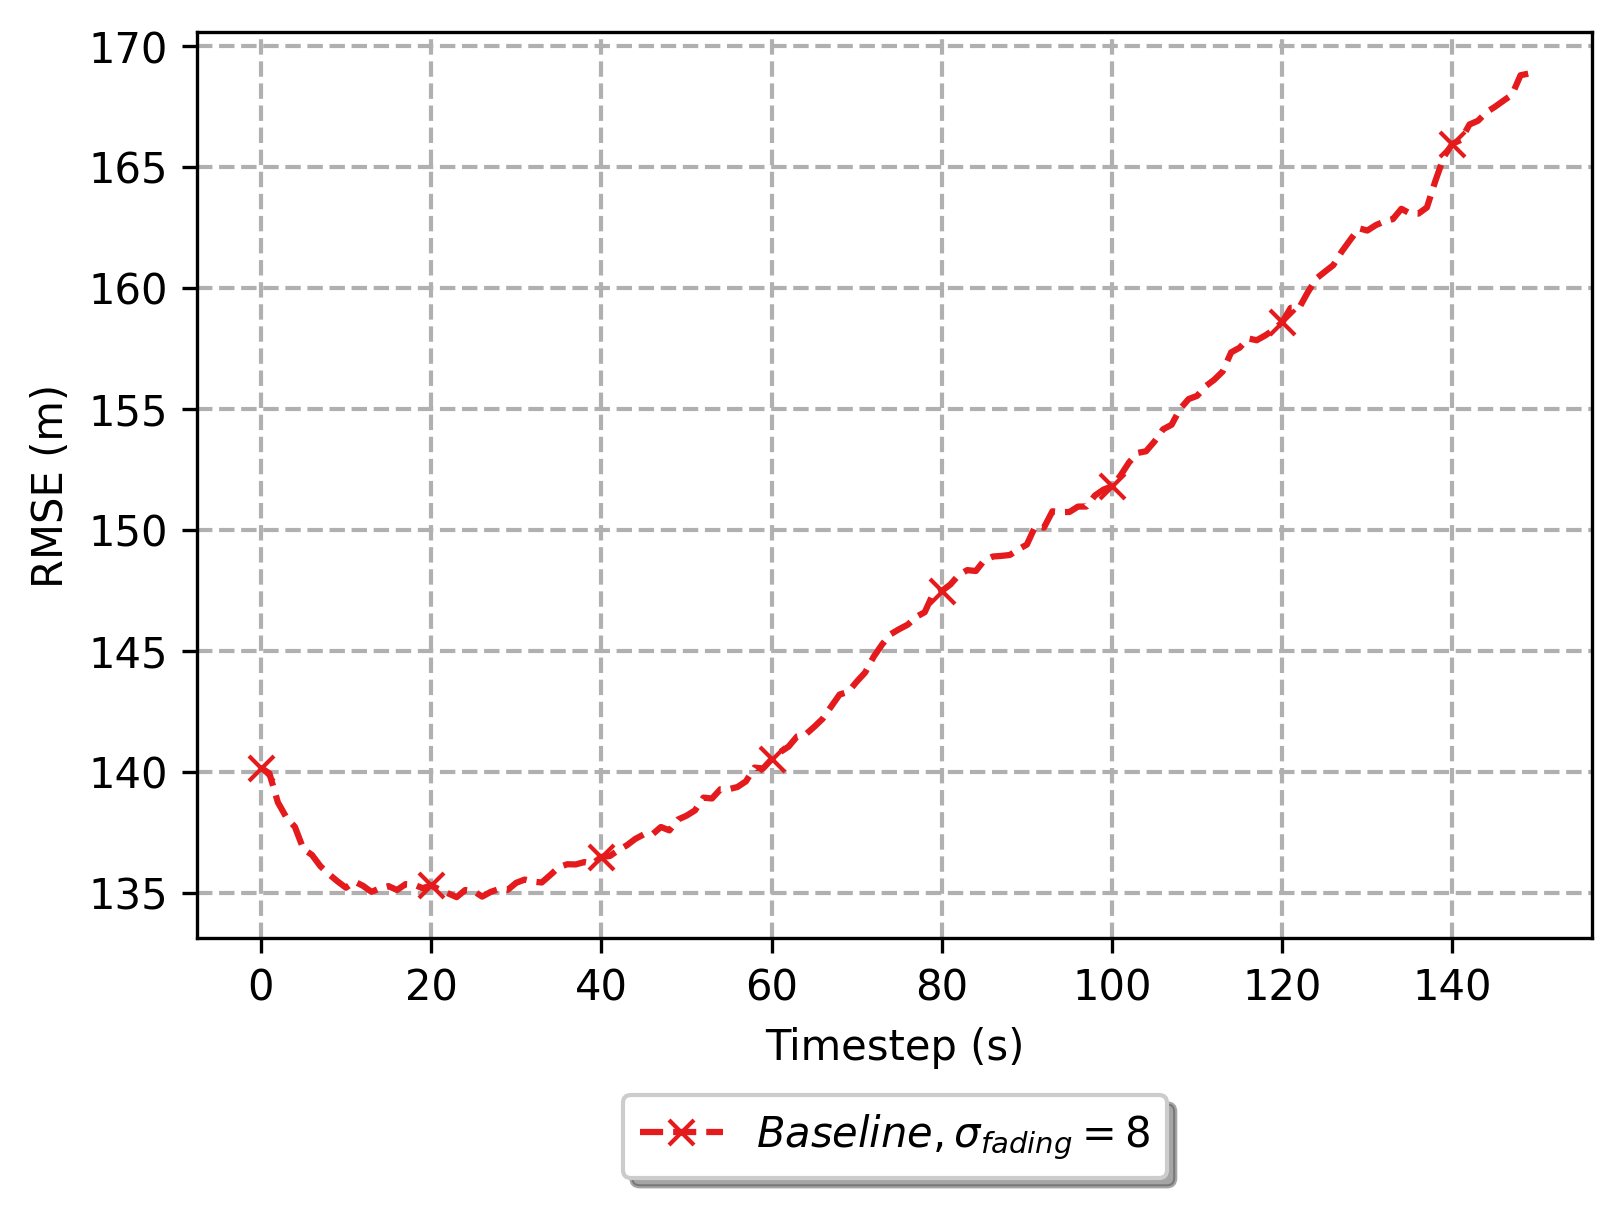

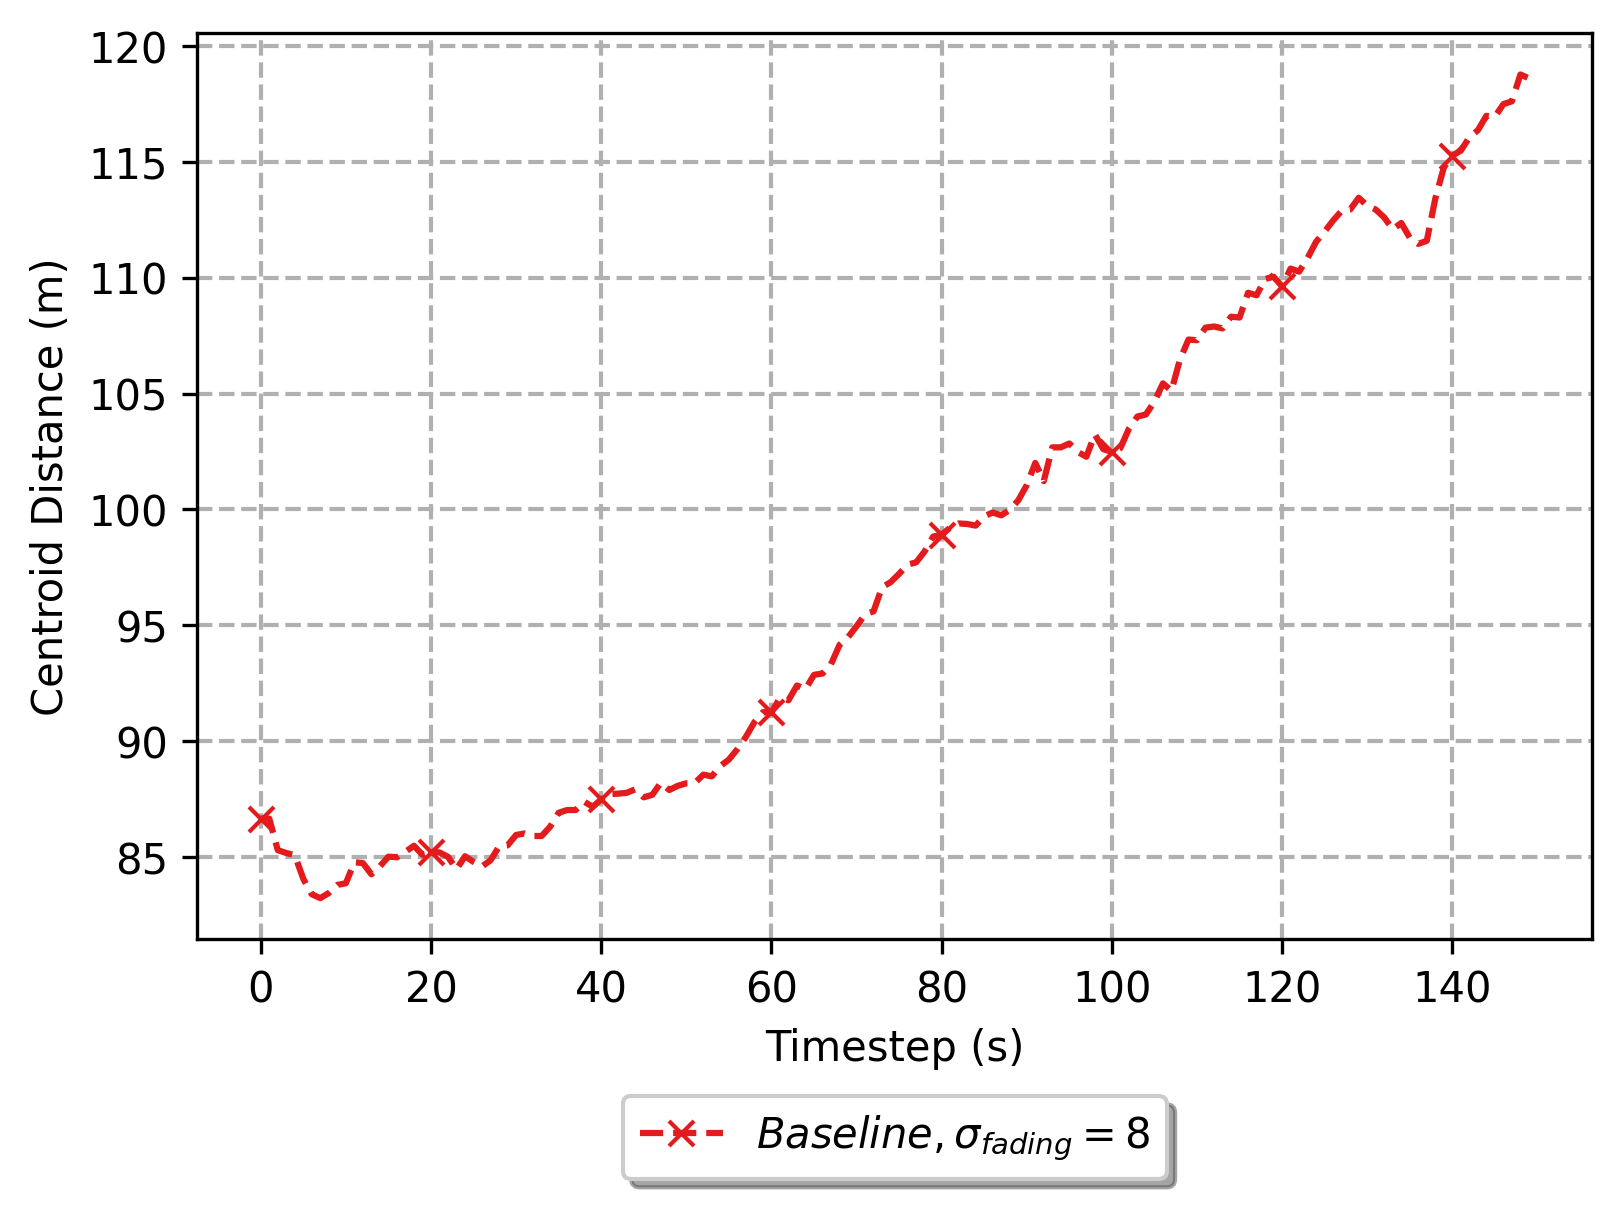

In [175]:
run_filter = {'sensor': 'doublerssilofi', 'reward':'range_reward', 'particle_resample':0.01, 'likelihood':'lofiv2'}
doublerssi_mean_metric_sigma_comparison(run_filter, 'rmse', sigmas=[8])
doublerssi_mean_metric_sigma_comparison(run_filter, 'centroid_err', sigmas=[8])

In [ ]:
plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:]

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward' }
doublerssi_mean_metric_sigma(run_filter, 'rmse', sigmas=[0,2,4])
doublerssi_mean_metric_sigma(run_filter, 'centroid_err', sigmas=[0,2,4])

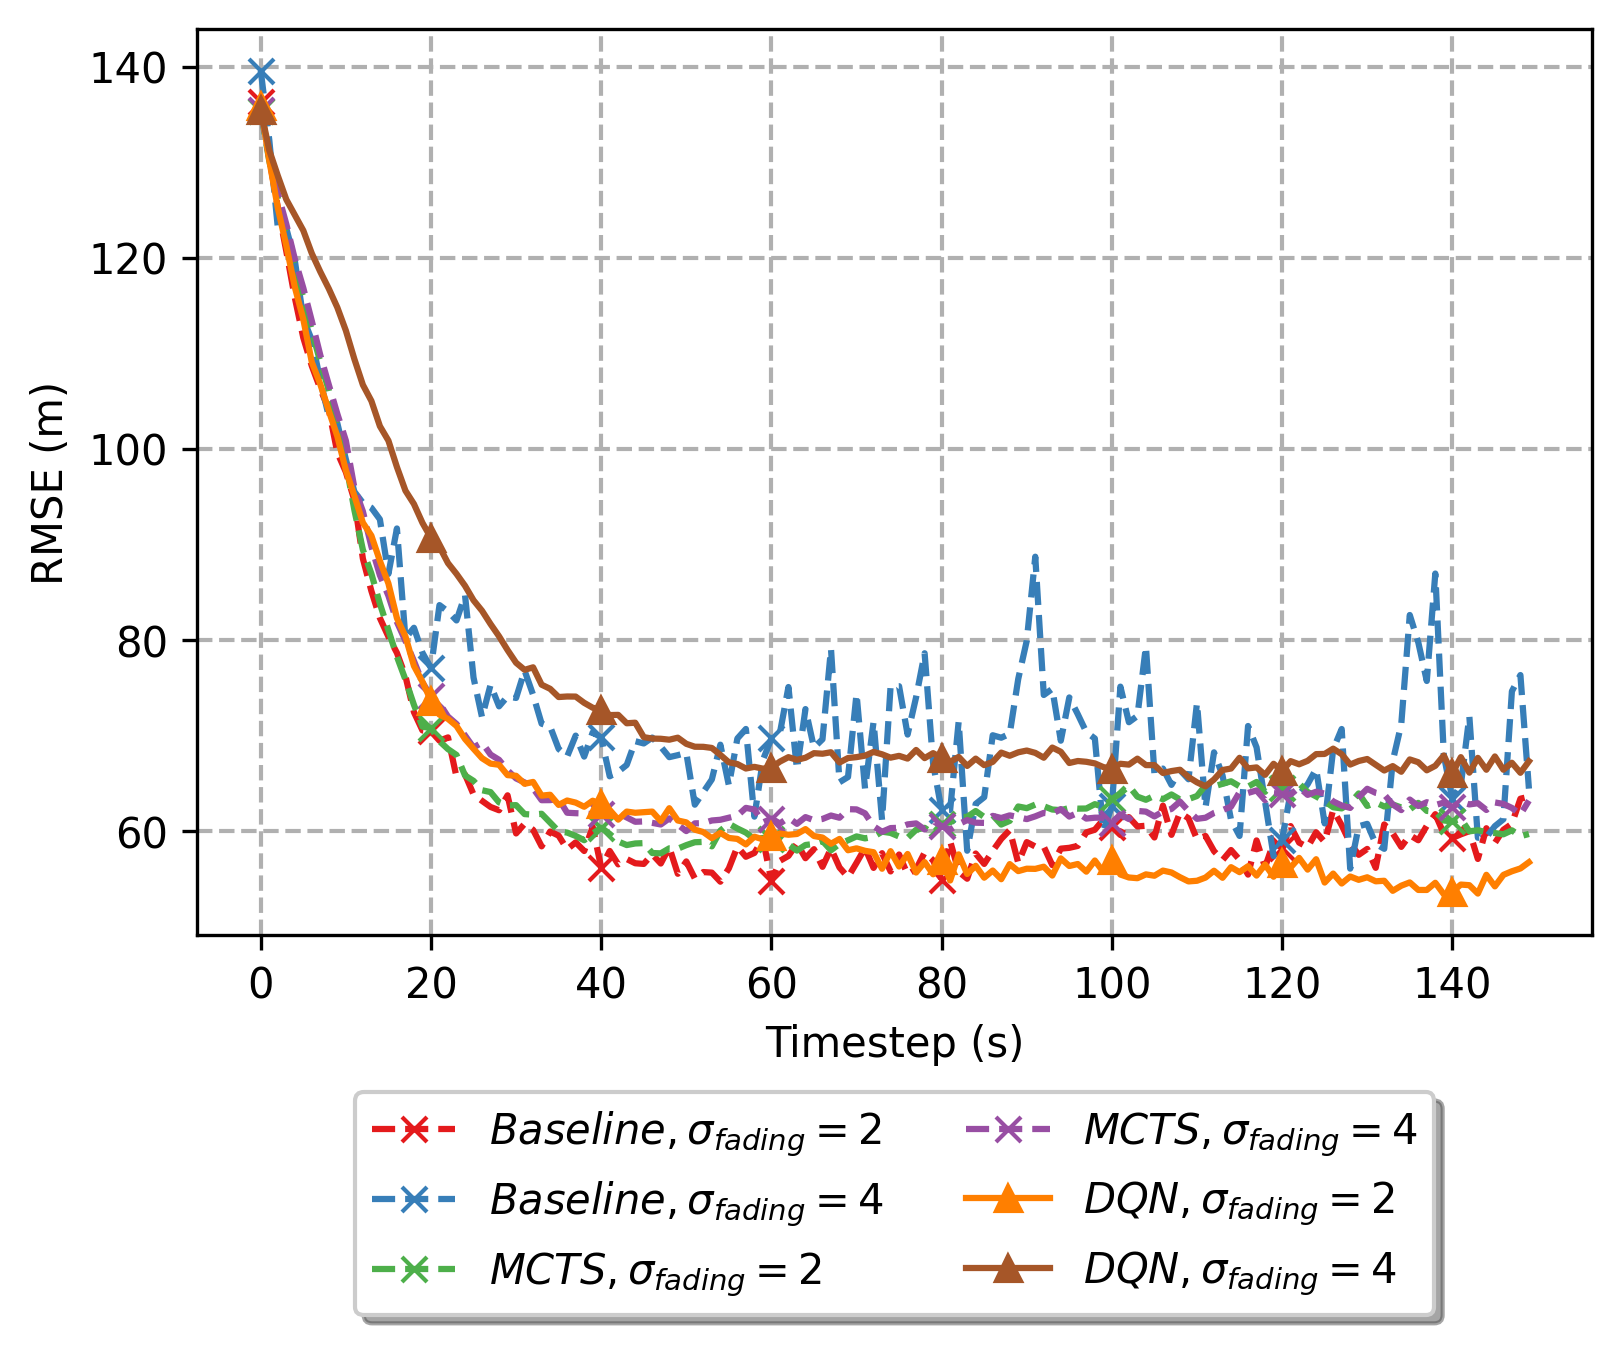

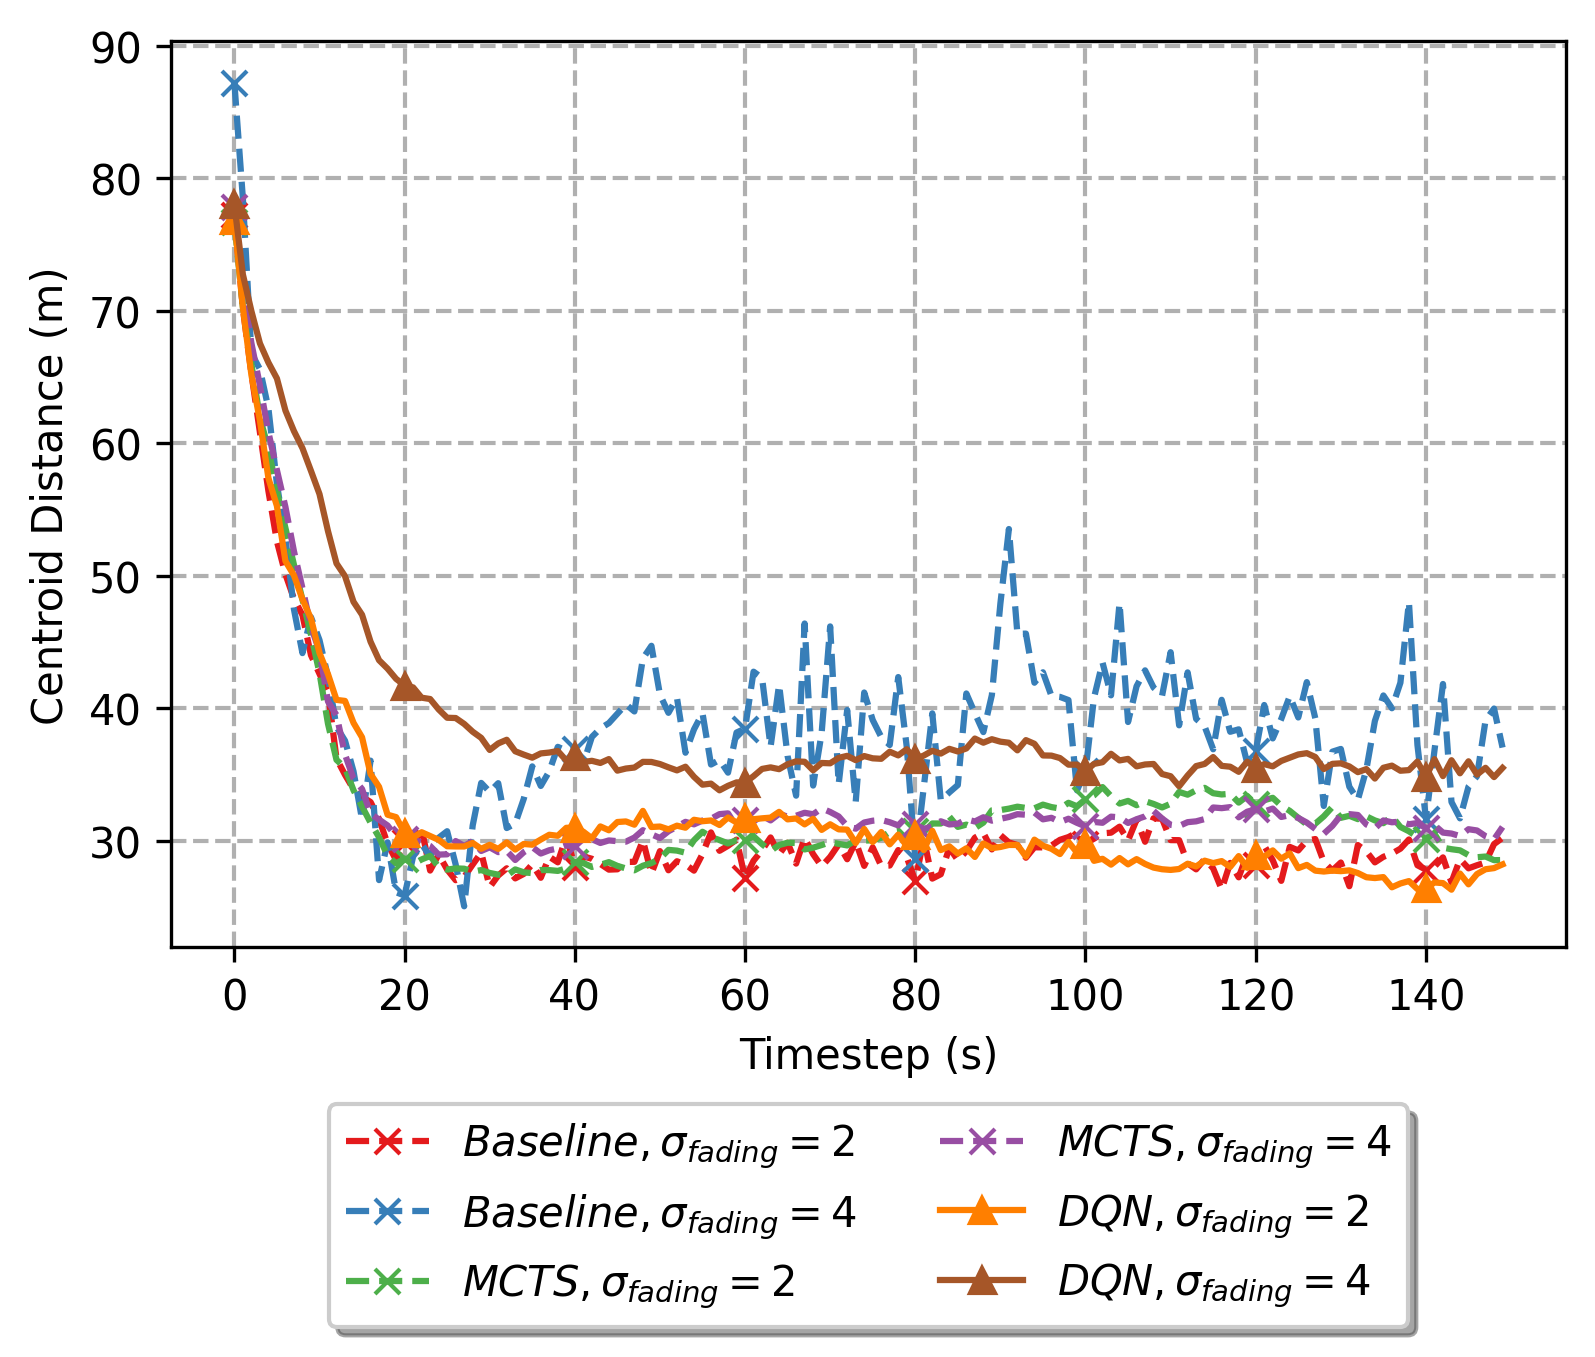

In [54]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'particle_resample':0.01}
doublerssi_mean_metric_sigma_comparison(run_filter, 'rmse', sigmas=[2,4])
doublerssi_mean_metric_sigma_comparison(run_filter, 'centroid_err', sigmas=[2,4])

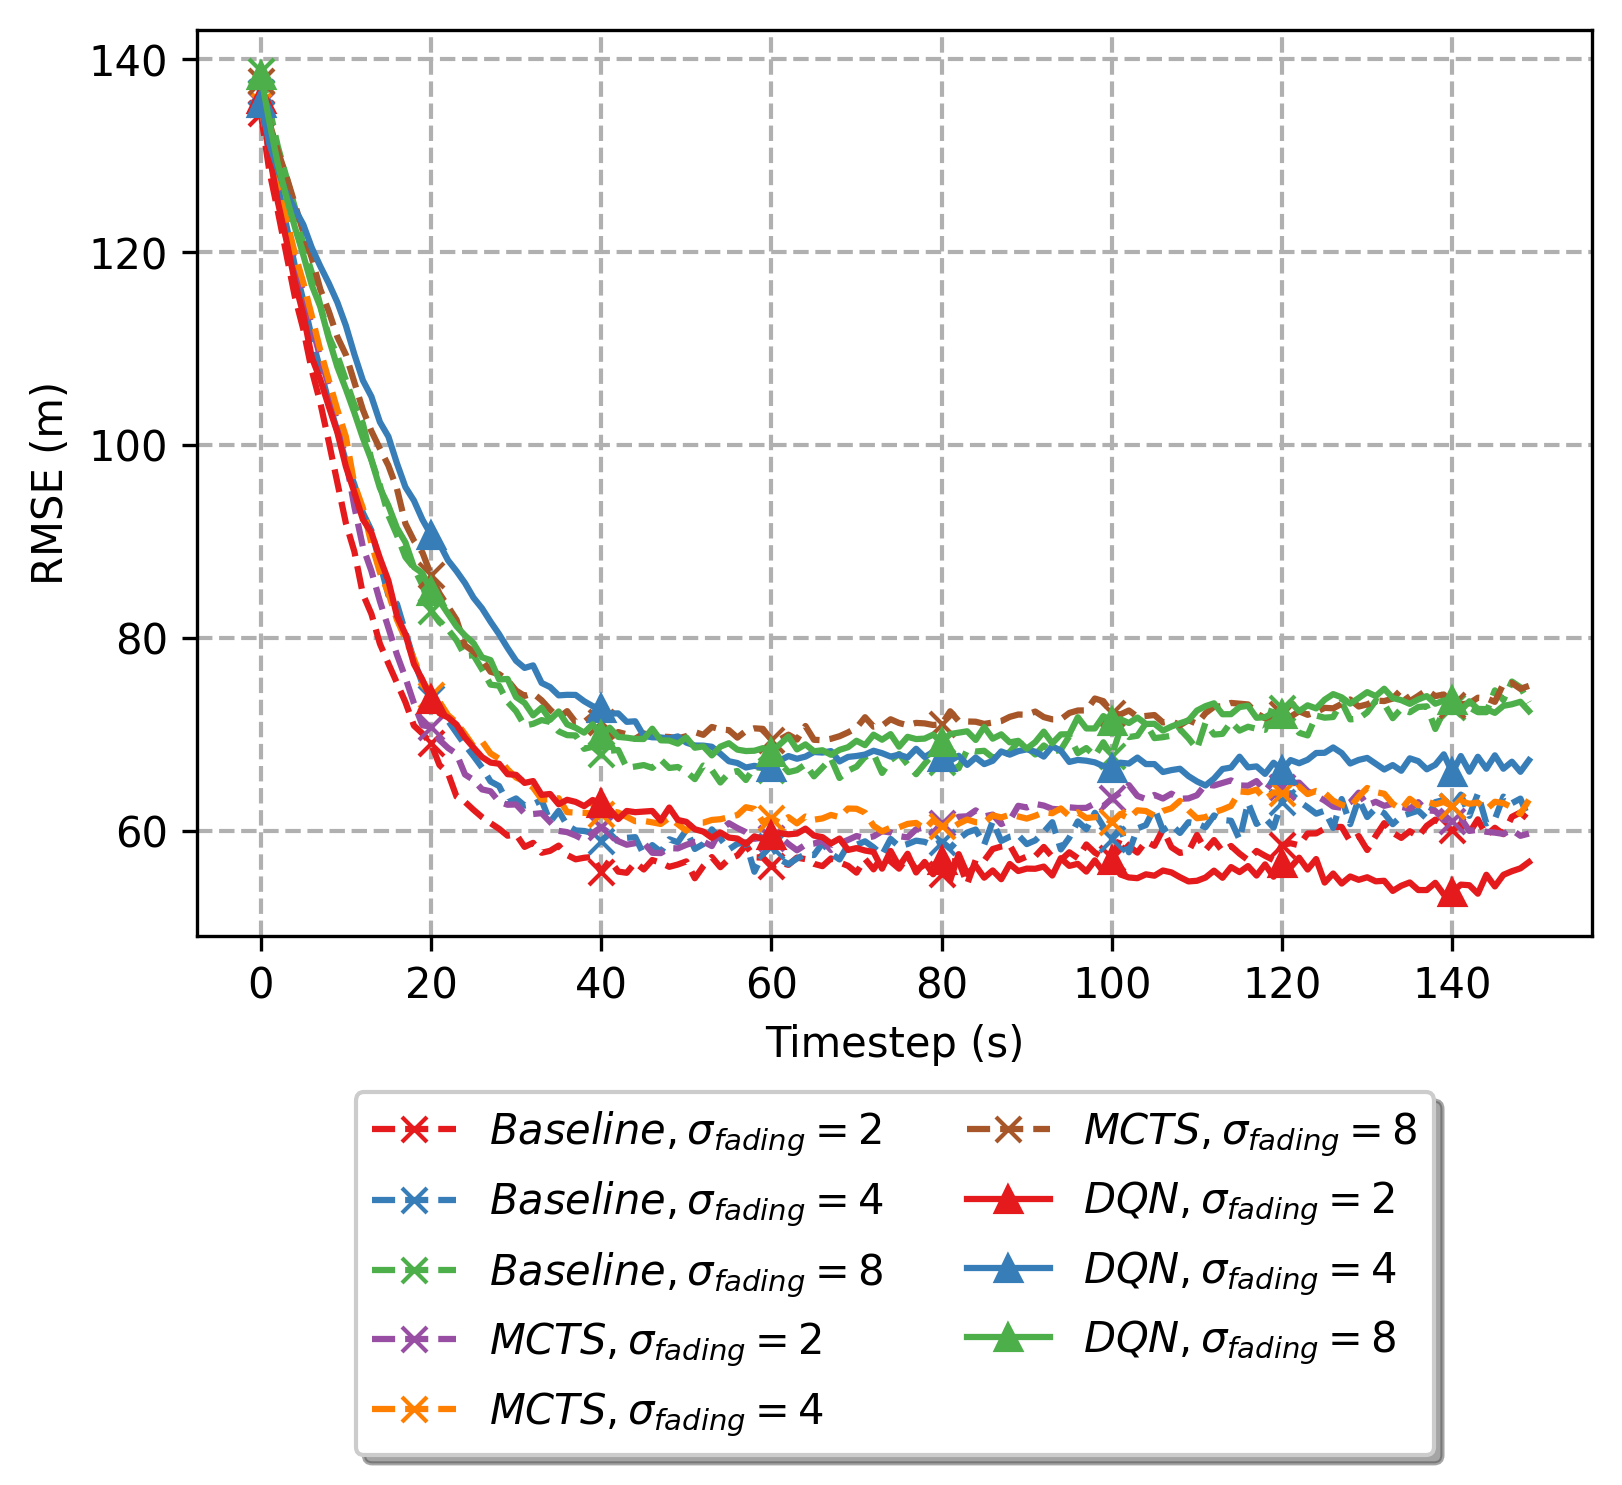

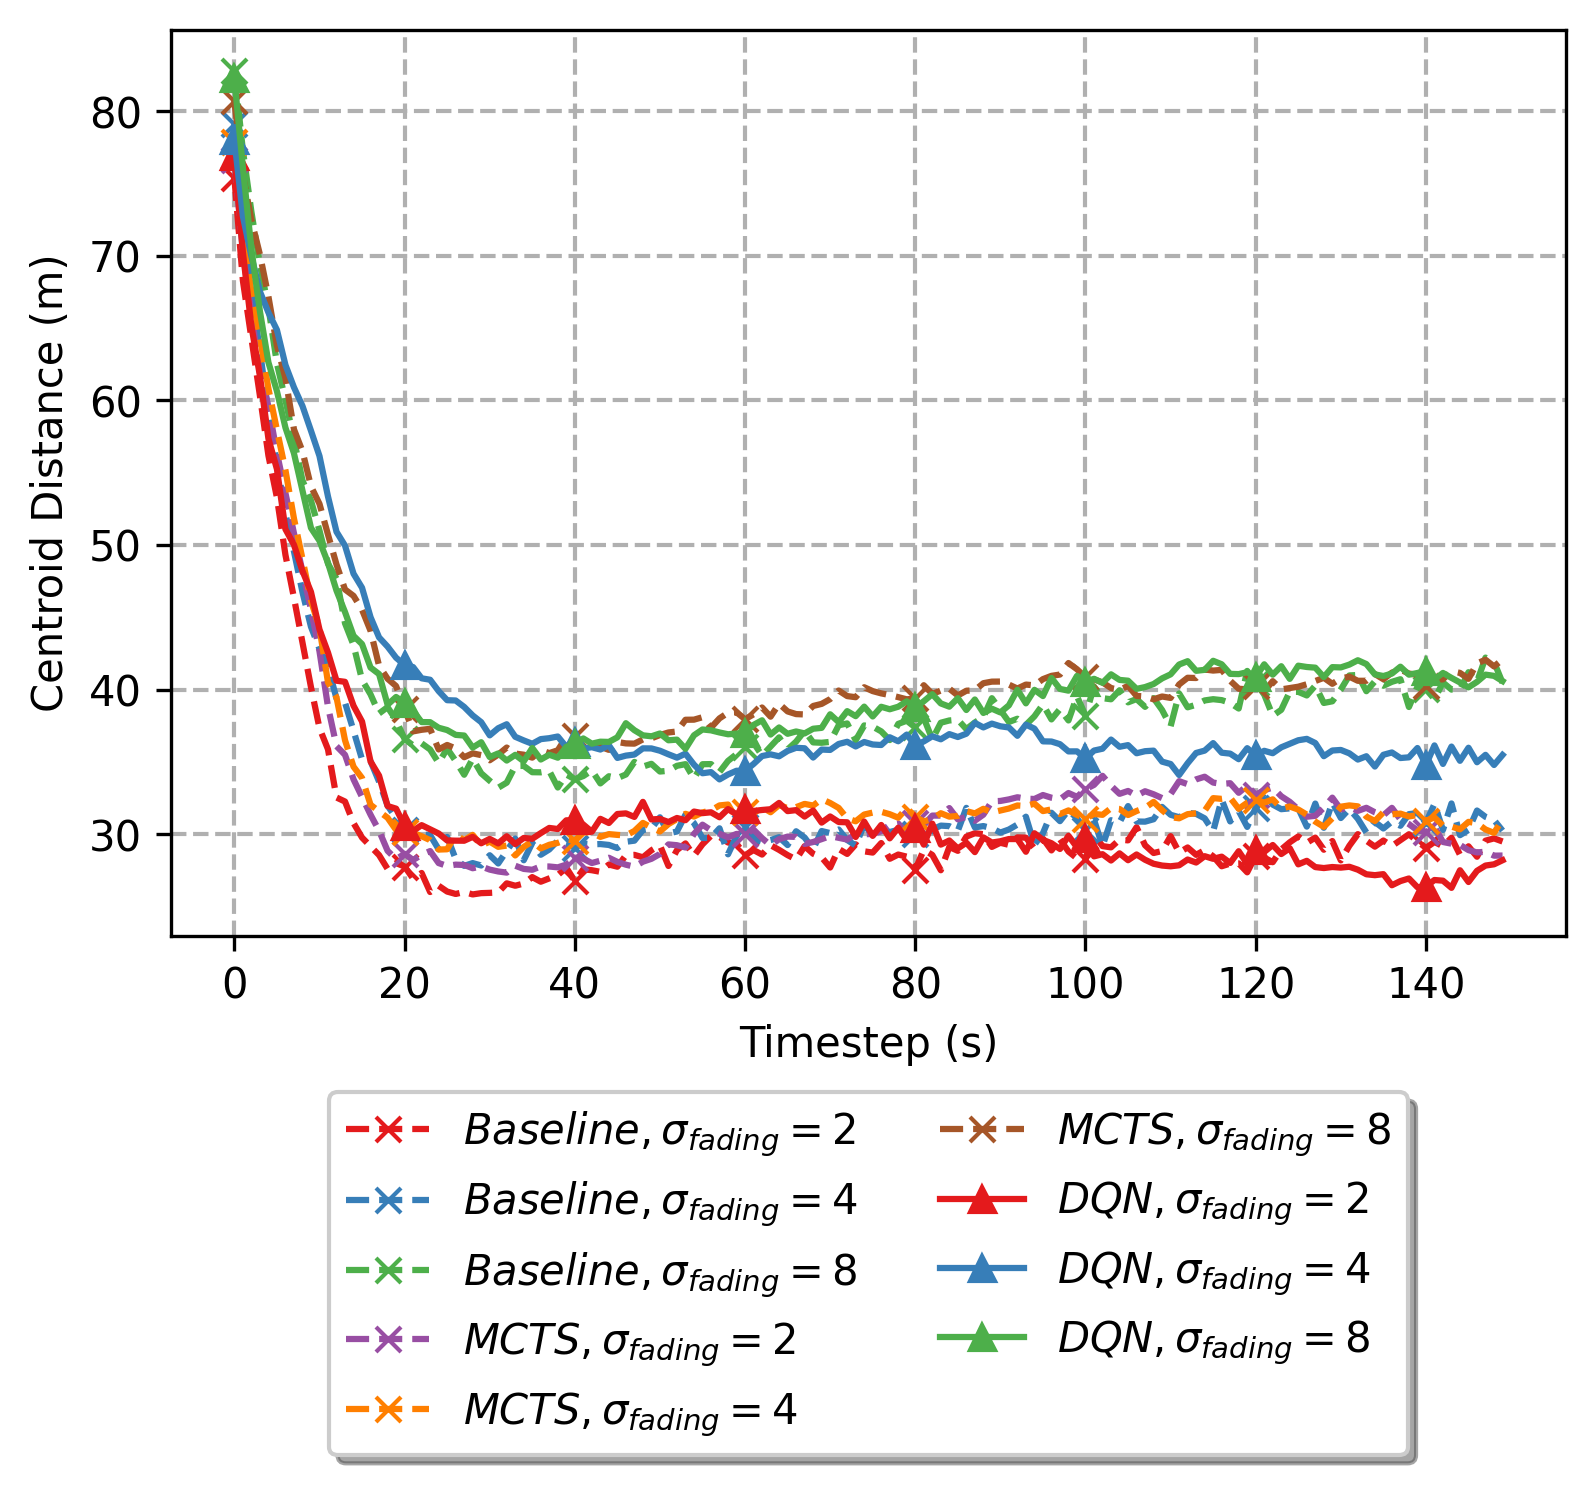

In [71]:
### FIGURE
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'particle_resample':0.01}
doublerssi_mean_metric_sigma_comparison(run_filter, 'rmse', sigmas=[2,4,8])
doublerssi_mean_metric_sigma_comparison(run_filter, 'centroid_err', sigmas=[2,4,8])

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward' }
doublerssi_mean_metric_sigma_comparison(run_filter, 'rmse', sigmas=[0,2])
doublerssi_mean_metric_sigma_comparison(run_filter, 'centroid_err', sigmas=[0,2])

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward' }
doublerssi_mean_metric_sigma_comparison(run_filter, 'rmse', sigmas=[2,4])
doublerssi_mean_metric_sigma_comparison(run_filter, 'centroid_err', sigmas=[2,4])

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward', 'fading_sigma':0 }
doublerssi_mean_metric_comparison(run_filter, 'rmse')
doublerssi_mean_metric_comparison(run_filter, 'centroid_err')

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward', 'fading_sigma':2 }
doublerssi_mean_metric_comparison(run_filter, 'rmse')
doublerssi_mean_metric_comparison(run_filter, 'centroid_err')

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'fading_sigma':0 }
doublerssi_mean_metric_comparison(run_filter, 'rmse')
doublerssi_mean_metric_comparison(run_filter, 'centroid_err')

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'fading_sigma':2 }
doublerssi_mean_metric_comparison(run_filter, 'rmse')
doublerssi_mean_metric_comparison(run_filter, 'centroid_err')

In [ ]:
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))

In [ ]:
for i,r in enumerate(dqn_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('dqn', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('dqn', r)['Methods'].get('fading_sigma',0))

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'range_reward', 'fading_sigma':4, 'particle_resample':0.01 }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

doublerssi_mean_metric('mcts',mcts_runs[0], 'rmse')

In [ ]:
run_filter = {'sensor': 'doublerssi', 'reward':'entropy_collision_reward', 'fading_sigma':4 }
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

doublerssi_mean_metric('dqn',dqn_runs[0], 'rmse')


In [12]:
def doublerssi_mean_metric(method, run, metric): 
    
    config = get_config(method, run)
    data = get_data(method, run)


    n_runs = data.shape[0]
    mean_metric = []
    for n in range(n_runs): 
        a = re.split(',', re.sub('[\n]+', ',', data[metric][n]))
        b = [re.sub('[\[\]]+', '', aa).strip() for aa in a]
        c = [re.split('\s+', bb) for bb in b ]
        d = [[float(ccc) for ccc in cc] for cc in c]
        #d = np.array(d)
        d = np.mean(d, axis=1)

        mean_metric.append(d)
    mean_metric = np.array(mean_metric)
    mean_metric = np.mean(mean_metric, axis=0)
    # plt.figure()
    # plt.plot(d[:,0])
    # plt.plot(d[:,1])
    # plt.show()

    plt.figure()
    plt.plot(mean_metric)
    plt.xlabel('timestep')
    plt.ylabel(metric)
    plt.show()

In [ ]:
a = [1, 3, 3, 4, 5, 6, 8, 8, 10]
b = [0]
for i in np.arange(1,len(a)): 
    if a[i] - a[i-1] == 2: 
        b.append(1)
    else:
        b.append(0)
print(a)
print(b)
print(list(np.cumsum(b)))


In [155]:
def process_counts(counts, cumulative=True): 
    
    new_count = [0]
    for i in np.arange(1,len(counts)):
        if counts[i] - counts[i-1] == 2: 
            new_count.append(1)
        else: 
            new_count.append(0)
    if cumulative: 
        metric = np.cumsum(new_count)
        return metric 
    else: 
        return new_count
        
        

def doublerssi_mean_counts(method, run, metric, cumulative=True): 

    config = get_config(method, run)
    data = get_data(method, run)
    
    n_runs = data.shape[0]
    mean_count = []
    for n in range(n_runs): 
        a = re.sub('[\n.\[\]]+', '', data[metric][n])
        b = re.split('\s+', a.strip())
        c = np.array([int(bb) for bb in b])
        c = process_counts(c, cumulative)
        #print(c)
        mean_count.append(c)
    mean_count = np.array(mean_count)
    mean_count = np.mean(mean_count, axis=0)
    plt.figure()
    plt.plot(mean_count)
    plt.xlabel('timestep')
    plt.ylabel(metric)
    plt.show()
    
def doublerssi_mean_count(data, metric, cumulative=True, process=True): 


    n_runs = data.shape[0]
    mean_count = []
    for n in range(n_runs): 
        
        if process: 
            a = re.sub('[\n.\[\]]+', '', data[metric][n])
            b = re.split('\s+', a.strip())
            c = np.array([int(bb) for bb in b])
            c = process_counts(c, cumulative)
        else: 
            a = re.sub('[\n\[\]]+', '', data[metric][n])
            b = re.split('\s+', a.strip())
            c = np.array([float(bb) for bb in b])
        #print(c)
        mean_count.append(c)
    
    mean_count = np.array(mean_count)
    print(mean_count)
    mean_count = np.mean(mean_count, axis=0)
    print(mean_count)

#     plt.figure()
#     plt.plot(mean_count)
#     plt.xlabel('timestep')
#     plt.ylabel(metric)
#     plt.show()
    return mean_count

In [120]:
run_filter = {'sensor': 'doublerssi', 'delta_col':'15', 'policy':'static'}
get_baseline_heuristic_metric_data(run_filter, 'collisions', cumulative=False, process=False)

[0.01766168 0.01398505 0.01099728 0.00881386 0.00674864 0.00621739
 0.00498777 0.00417663 0.00341033 0.00303804 0.00290353 0.00259239
 0.00194973 0.00186005 0.00172418 0.00171875 0.00203125 0.00190625
 0.00171603 0.00195245 0.00136141 0.00157473 0.00165082 0.00189538
 0.00202582 0.00137772 0.00121332 0.0010394  0.00102989 0.00124728
 0.00176359 0.0019375  0.00239946 0.00227174 0.00160598 0.00127989
 0.0011413  0.00103397 0.0009606  0.00094022 0.00093342 0.00103125
 0.00120924 0.00166304 0.00212364 0.00259511 0.00283016 0.00476766
 0.00417527 0.00422826 0.00384647 0.00546196 0.00578668 0.00658832
 0.00895924 0.01039674 0.00686957 0.00779348 0.00682745 0.00872283
 0.0078125  0.00789946 0.00579076 0.00546739 0.00541712 0.0058913
 0.00610054 0.00593886 0.0036712  0.00304348 0.00256929 0.00230027
 0.00186821 0.00251359 0.00292255 0.00189538 0.00194022 0.00211277
 0.00316984 0.00437772 0.00511413 0.00427582 0.00441033 0.00405299
 0.00454891 0.00529076 0.0054144  0.00714266 0.00789266 0.00771

array([0.01766168, 0.01398505, 0.01099728, 0.00881386, 0.00674864,
       0.00621739, 0.00498777, 0.00417663, 0.00341033, 0.00303804,
       0.00290353, 0.00259239, 0.00194973, 0.00186005, 0.00172418,
       0.00171875, 0.00203125, 0.00190625, 0.00171603, 0.00195245,
       0.00136141, 0.00157473, 0.00165082, 0.00189538, 0.00202582,
       0.00137772, 0.00121332, 0.0010394 , 0.00102989, 0.00124728,
       0.00176359, 0.0019375 , 0.00239946, 0.00227174, 0.00160598,
       0.00127989, 0.0011413 , 0.00103397, 0.0009606 , 0.00094022,
       0.00093342, 0.00103125, 0.00120924, 0.00166304, 0.00212364,
       0.00259511, 0.00283016, 0.00476766, 0.00417527, 0.00422826,
       0.00384647, 0.00546196, 0.00578668, 0.00658832, 0.00895924,
       0.01039674, 0.00686957, 0.00779348, 0.00682745, 0.00872283,
       0.0078125 , 0.00789946, 0.00579076, 0.00546739, 0.00541712,
       0.0058913 , 0.00610054, 0.00593886, 0.0036712 , 0.00304348,
       0.00256929, 0.00230027, 0.00186821, 0.00251359, 0.00292

In [ ]:
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_counts('mcts', r, 'collisions')

In [ ]:
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_counts('mcts', r, 'lost')

In [ ]:
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_metric('mcts', r, 'centroid_err')

In [ ]:
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_metric('mcts', r, 'rmse')

In [152]:
def doublerssi_mean_counts_comparison(run_filter, metric, cumulative=False): 
    
    mcts_runs = filter_runs('mcts', run_filter)
    mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
    dqn_runs = filter_runs('dqn', run_filter)
    dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

    mcts_data = get_data('mcts', mcts_runs[0])
    dqn_data = get_data('dqn', dqn_runs[0])


    #assert mcts_data.shape[0] == dqn_data.shape[0]
    
    mcts_mean = doublerssi_mean_count(mcts_data, metric, cumulative=cumulative)
    dqn_mean = doublerssi_mean_count(dqn_data, metric, cumulative=cumulative)
    
    fig, ax = plt.subplots()
    ax.plot(mcts_mean, color='blue', marker='x', markevery=10, label='MCTS')
    ax.plot(dqn_mean, color='green', marker='D', markevery=10, label='DQN')
    #ax.set_ylim(bottom=-0.05)
    ax.set_xlabel('timestep')
    ax.set_ylabel(metric)
    ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True,)
    ax.grid( linestyle = '--', linewidth = 1)
    
def doublerssi_reward_comparison(run_filter, metric, cumulative=False): 
    
    mcts_datas = []
    dqn_datas = []
    rewards = ['entropy_collision_reward', 'range_reward']
    for reward in rewards: 
        run_filter['reward'] = reward
        
        mcts_runs = filter_runs('mcts', run_filter)
        mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        dqn_runs = filter_runs('dqn', run_filter)
        dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        print(reward)
        print(mcts_runs)
        print(dqn_runs)
        mcts_data = get_data('mcts', mcts_runs[0])
        dqn_data = get_data('dqn', dqn_runs[0])

        #assert mcts_data.shape[0] == dqn_data.shape[0]

        mcts_mean = doublerssi_mean_count(mcts_data, metric, cumulative=cumulative)
        dqn_mean = doublerssi_mean_count(dqn_data, metric, cumulative=cumulative)
        
        mcts_datas.append(mcts_mean)
        dqn_datas.append(dqn_mean)
    
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    ax.set_prop_cycle('color',plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:])
    reward_label = {'entropy_collision_reward':'entropy', 'range_reward':'heuristic'}
    for i,reward in enumerate(rewards): 
        ax.plot(mcts_datas[i], marker='x', markevery=20, linestyle='--', label=r'$MCTS, r_{{{}}}$'.format(reward_label[reward]))
    
    for i,reward in enumerate(rewards): 
        ax.plot(dqn_datas[i], marker='^', markevery=20, label=r'$DQN, r_{{{}}}$'.format(reward_label[reward]))
    
    ax.set_xlabel('Timestep (s)')
    metric_label = {'lost':'"Lost" rate', 'collisions':'"Collision" rate'}
    ax.set_ylabel(metric_label[metric])
    
    #ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True, ncol=2)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=True, ncol=2)
    ax.grid( linestyle = '--', linewidth = 1)
    
    ####
    
def get_heuristic_metric_data(run_filter, metric, cumulative=False, process=True): 
    mcts_datas = []
    dqn_datas = []
    rewards = ['entropy_collision_reward', 'range_reward']
    for reward in rewards: 
        run_filter['reward'] = reward
        
        mcts_runs = filter_runs('mcts', run_filter)
        mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        dqn_runs = filter_runs('dqn', run_filter)
        dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
        print(run_filter)
        
        

        #assert mcts_data.shape[0] == dqn_data.shape[0]
        mcts_data = get_data('mcts', mcts_runs[0])
        mcts_mean = doublerssi_mean_count(mcts_data, metric, cumulative=cumulative, process=process)
        mcts_datas.append(mcts_mean)
        
        try: 
            dqn_data = get_data('dqn', dqn_runs[0])
            dqn_mean = doublerssi_mean_count(dqn_data, metric, cumulative=cumulative, process=process)
            dqn_datas.append(dqn_mean)
        except: 
            pass
    return mcts_datas, dqn_datas

def get_baseline_heuristic_metric_data(run_filter, metric, cumulative=False, process=True): 
    #baseline_datas = []
    baseline_filter = run_filter.copy()
    baseline_filter['policy'] = 'random'
    baseline_runs = filter_runs('baseline', baseline_filter)
    print(baseline_filter)
    baseline_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)

    print(get_config('baseline', baseline_runs[0]))
    baseline_data = get_data('baseline', baseline_runs[0])

    baseline_mean = doublerssi_mean_count(baseline_data, metric, cumulative=cumulative, process=process)


    #baseline_datas.append(baseline_mean)

    return baseline_mean

def doublerssi_heuristic_metric_comparison(run_filter, cumulative=False): 
    
    if run_filter.get('delta_col',None) is not None: 
        process=False
    else: 
        process=True
    metrics = ['lost', 'collisions']
    rewards = ['entropy_collision_reward', 'range_reward']
    fig, axs = plt.subplots(2,1, figsize=(6,8), dpi=300, sharex=True)
    axs[0].set_prop_cycle('color',plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:])
    axs[1].set_prop_cycle('color',plt.cm.get_cmap('Set1')(np.linspace(0,1,9))[[0,1,2,3,4,6],:])
    reward_label = {'entropy_collision_reward':'entropy', 'range_reward':'heuristic'}
    metric_label = {'lost':'"Lost" rate', 'collisions':'"Collision" rate'}
    
    for m in range(len(metrics)): 
        baseline_mean = get_baseline_heuristic_metric_data(run_filter, metrics[m], cumulative, process)
        axs[m].plot(baseline_mean, marker='x', markevery=20, linestyle='--', label=r'$Baseline}$')
        print('here')
        print(run_filter)
        mcts_datas, dqn_datas = get_heuristic_metric_data(run_filter, metrics[m], cumulative, process)
        for i,reward in enumerate(rewards): 
            axs[m].plot(mcts_datas[i], marker='x', markevery=20, linestyle='--', label=r'$MCTS, r_{{{}}}$'.format(reward_label[reward]))

        try: 
            for i,reward in enumerate(rewards): 
                axs[m].plot(dqn_datas[i], marker='^', markevery=20, label=r'$DQN, r_{{{}}}$'.format(reward_label[reward]))
        except: 
            pass
        axs[m].set_ylabel(metric_label[metrics[m]])
        axs[m].grid( linestyle = '--', linewidth = 1)
    axs[1].set_xlabel('Timestep (s)')
    
    #ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5), fancybox=True, shadow=True, ncol=2)
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=True, ncol=2)
    

In [156]:
run_filter = {'sensor': 'doublerssilofi', 'delta_col':'15', 'policy':'random'}
get_baseline_heuristic_metric_data(run_filter, 'collisions', cumulative=False, process=False)

{'sensor': 'doublerssilofi', 'delta_col': '15', 'policy': 'random'}
{'Methods': {'env': 'RFMultiEnv', 'method': 'baseline', 'action': 'baselineactions', 'sensor': 'doublerssilofi', 'state': 'rfmultistate', 'target_speed': '1.0', 'target_start': '100', 'fading_sigma': '8.0', 'particle_resample': '0.01', 'particle_min': '10', 'particle_max': '200', 'delta_col': '15', 'plotting': 'False', 'trials': '500', 'timesteps': '150', 'reward': 'range_reward'}, 'Defaults': {'policy': 'random', 'plotting': 'False', 'trials': '500', 'timesteps': '150'}}
[[0.02875 0.02825 0.02675 ... 0.      0.      0.00025]
 [0.03025 0.0345  0.0355  ... 0.00875 0.0075  0.0085 ]
 [0.02075 0.024   0.023   ... 0.015   0.01025 0.00375]
 ...
 [0.02725 0.0225  0.02225 ... 0.0135  0.022   0.021  ]
 [0.0225  0.01425 0.01025 ... 0.00475 0.003   0.00275]
 [0.03675 0.04075 0.04775 ... 0.004   0.0005  0.0005 ]]
[0.02789583 0.02535417 0.024625   0.02357083 0.02337917 0.0231875
 0.02137917 0.02039167 0.0214125  0.0218     0.021295

array([0.02789583, 0.02535417, 0.024625  , 0.02357083, 0.02337917,
       0.0231875 , 0.02137917, 0.02039167, 0.0214125 , 0.0218    ,
       0.02129583, 0.02101667, 0.02085417, 0.02065417, 0.018925  ,
       0.01819583, 0.01801667, 0.01729583, 0.01787083, 0.01802917,
       0.0176625 , 0.017975  , 0.01689583, 0.0158125 , 0.01485   ,
       0.013075  , 0.014275  , 0.0140875 , 0.01339583, 0.01355833,
       0.01280417, 0.0121875 , 0.01145833, 0.01180833, 0.0109    ,
       0.0103125 , 0.009375  , 0.010175  , 0.01049167, 0.00984167,
       0.01058333, 0.00912917, 0.00941667, 0.00850833, 0.00962083,
       0.01027083, 0.01038333, 0.0102125 , 0.00979583, 0.00979583,
       0.01009583, 0.01069583, 0.00985   , 0.00895417, 0.0097125 ,
       0.00980417, 0.00885417, 0.00857917, 0.00753333, 0.00727083,
       0.00795   , 0.00782917, 0.00781667, 0.0081625 , 0.0080125 ,
       0.00720417, 0.0072625 , 0.007025  , 0.00805   , 0.00728333,
       0.00646667, 0.00654167, 0.00742083, 0.00809583, 0.00756

In [146]:
run_filter = {'sensor': 'doublerssilofi','fading_sigma':8 }

mcts_runs = filter_runs('mcts', run_filter)
print(mcts_runs)

['2022-04-05T13:40:56', '2022-04-05T13:40:07']


{'sensor': 'doublerssilofi', 'fading_sigma': '8.0', 'delta_col': '15', 'policy': 'random'}
{'Methods': {'env': 'RFMultiEnv', 'method': 'baseline', 'action': 'baselineactions', 'sensor': 'doublerssilofi', 'state': 'rfmultistate', 'target_speed': '1.0', 'target_start': '100', 'fading_sigma': '8.0', 'particle_resample': '0.01', 'particle_min': '10', 'particle_max': '200', 'delta_col': '15', 'plotting': 'False', 'trials': '500', 'timesteps': '150', 'reward': 'range_reward'}, 'Defaults': {'policy': 'random', 'plotting': 'False', 'trials': '500', 'timesteps': '150'}}
[0.264      0.26390254 0.26575    0.26822881 0.27004661 0.27110593
 0.2724322  0.27367373 0.27114831 0.27263983 0.27280508 0.27463983
 0.27290254 0.27391102 0.27598729 0.27760169 0.27707203 0.27994915
 0.27757203 0.28005508 0.27897034 0.27759322 0.27886017 0.27919492
 0.28139831 0.28358051 0.28547034 0.28619492 0.28744068 0.29205508
 0.29363559 0.29541949 0.29647034 0.30013559 0.30174153 0.30782203
 0.31007627 0.31111017 0.31259

[0.02642857 0.02621429 0.02639286 0.02803571 0.02928571 0.03310714
 0.03489286 0.03828571 0.03460714 0.03378571 0.03157143 0.02446429
 0.01817857 0.01453571 0.01578571 0.01207143 0.01367857 0.01617857
 0.01367857 0.01282143 0.01414286 0.01435714 0.01375    0.01496429
 0.01425    0.01189286 0.01142857 0.01078571 0.01403571 0.01442857
 0.01503571 0.01767857 0.02017857 0.02046429 0.01264286 0.01714286
 0.01528571 0.01775    0.01989286 0.01971429 0.01746429 0.01732143
 0.01832143 0.01660714 0.01457143 0.01139286 0.00975    0.01196429
 0.01303571 0.01492857 0.013      0.01264286 0.01285714 0.01328571
 0.01414286 0.01239286 0.01339286 0.01435714 0.01139286 0.01610714
 0.01667857 0.01814286 0.01685714 0.01742857 0.01985714 0.01932143
 0.02057143 0.0195     0.0215     0.02717857 0.02628571 0.02739286
 0.02367857 0.01796429 0.01642857 0.01121429 0.01053571 0.00946429
 0.01110714 0.00996429 0.01135714 0.01485714 0.01017857 0.00992857
 0.01035714 0.00914286 0.00853571 0.00717857 0.00717857 0.0066

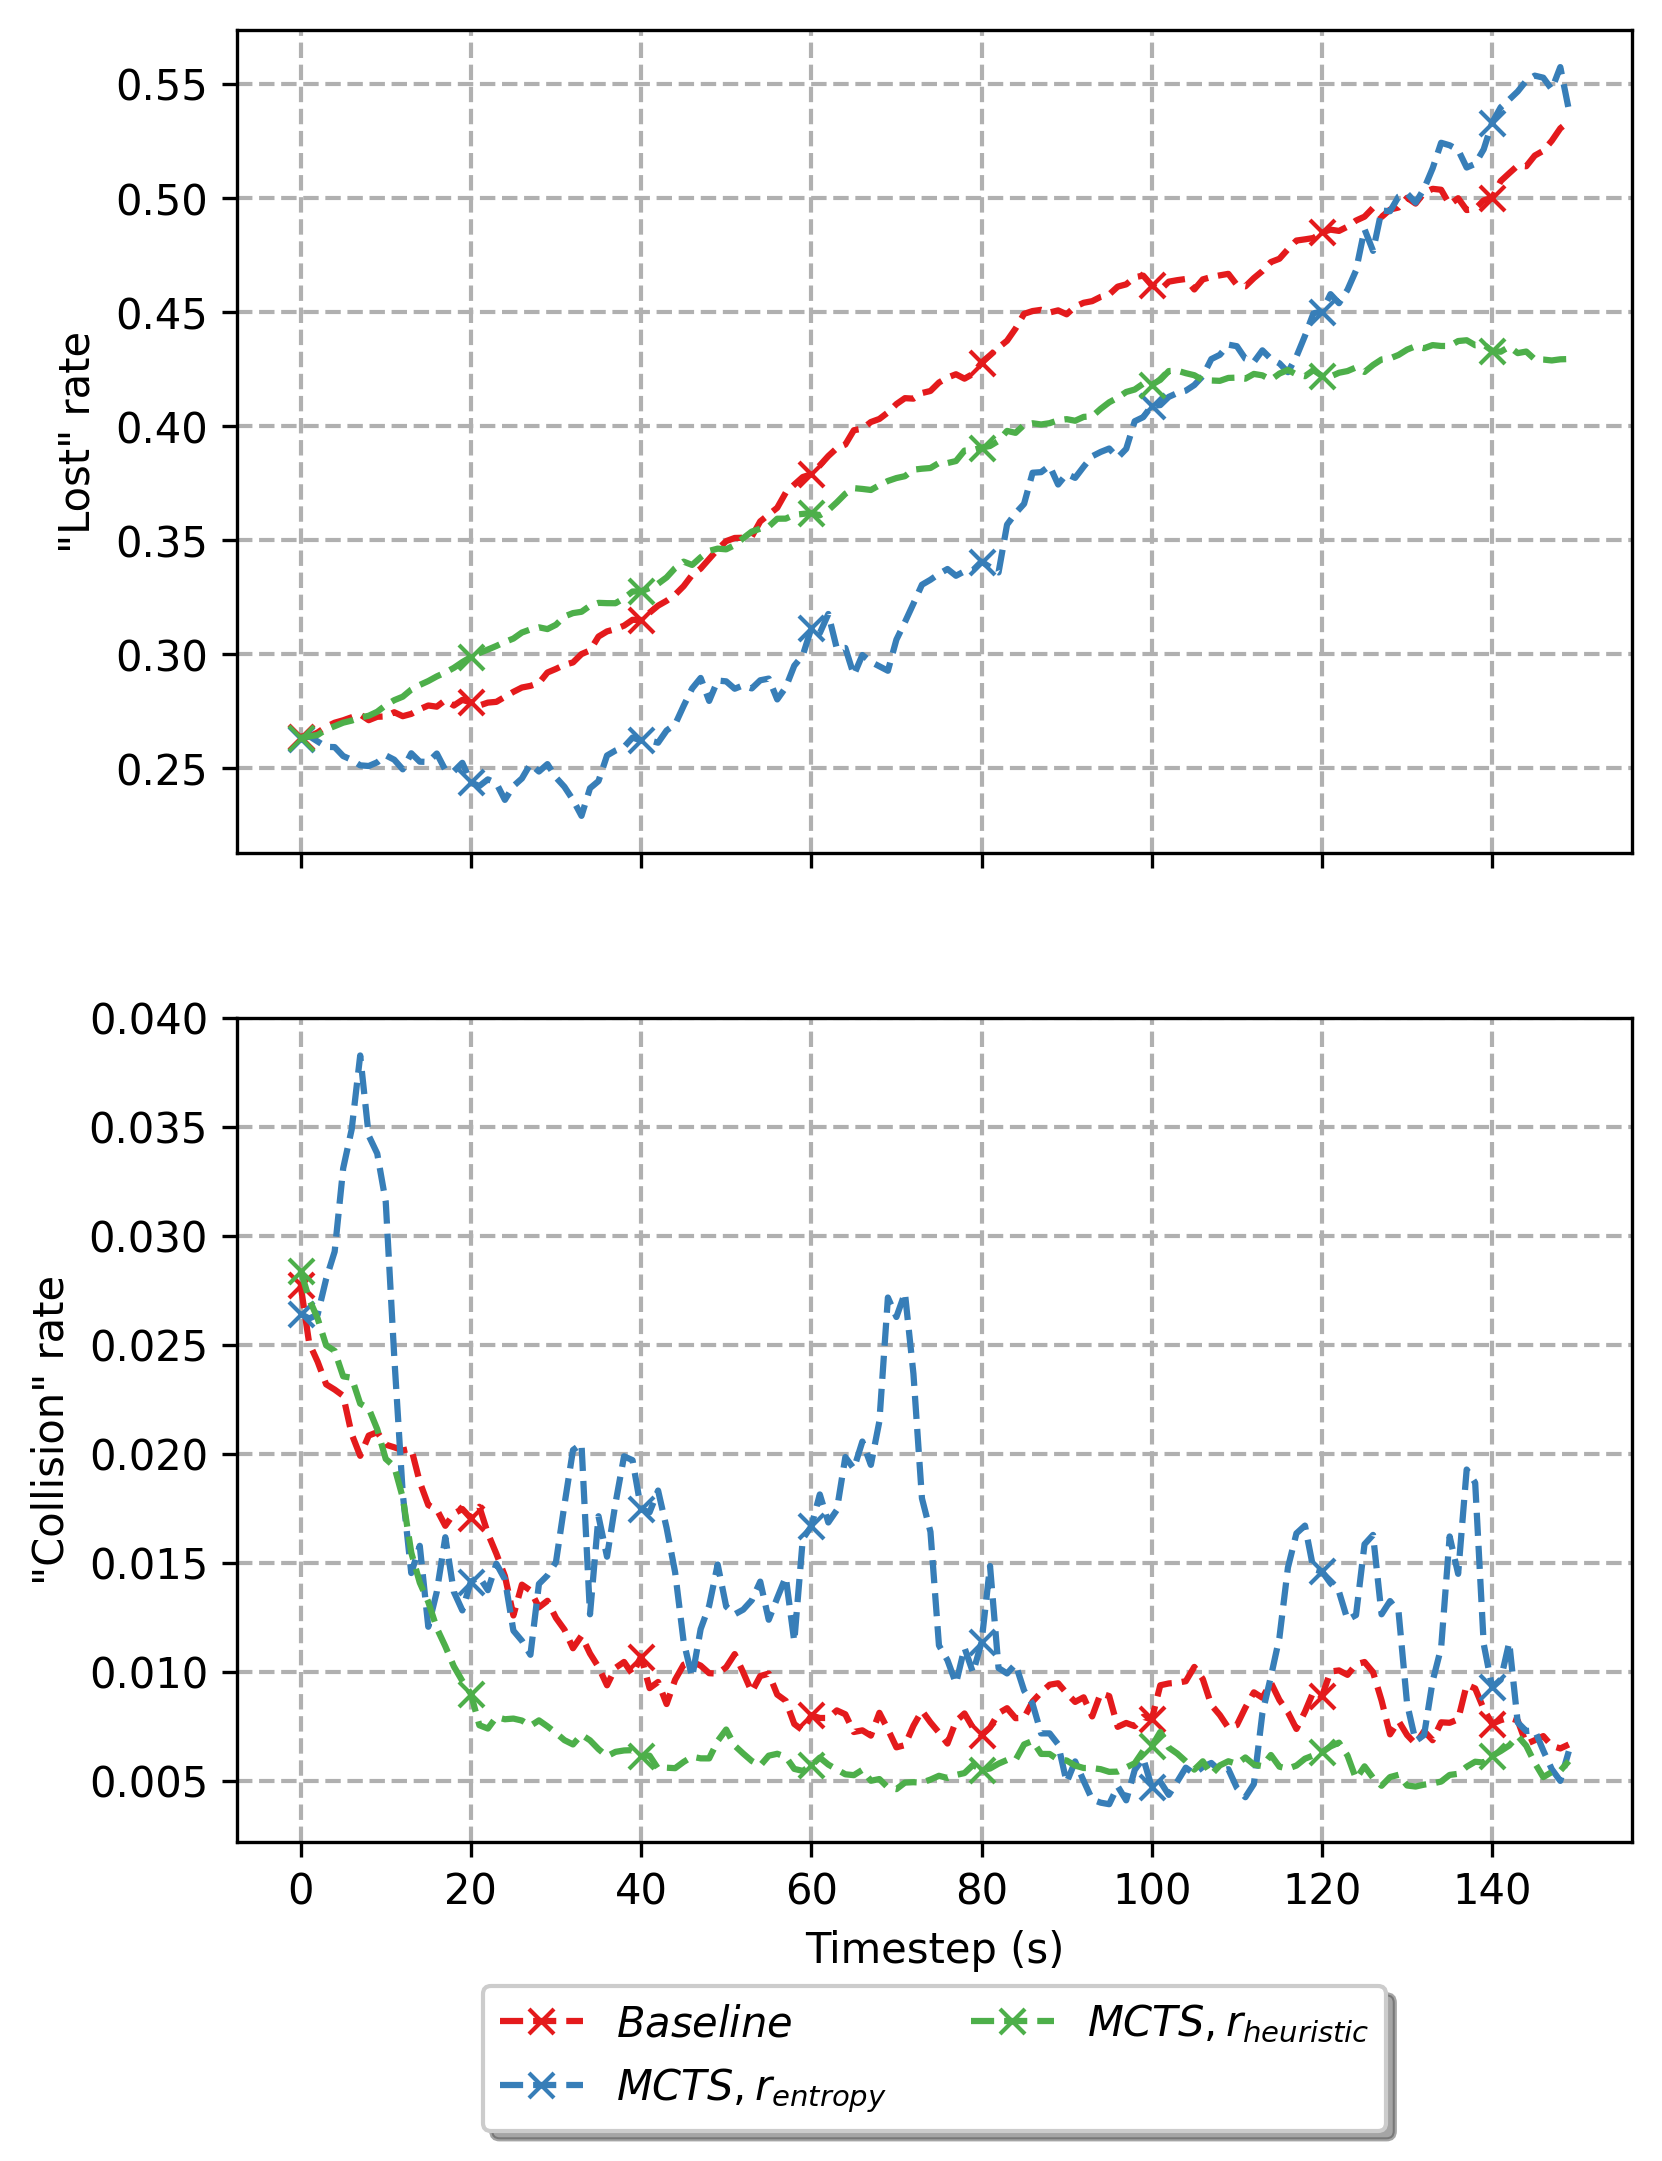

In [153]:
run_filter = {'sensor': 'doublerssilofi', 'fading_sigma':'8.0', 'delta_col':'15'}
doublerssi_heuristic_metric_comparison(run_filter, cumulative=False )

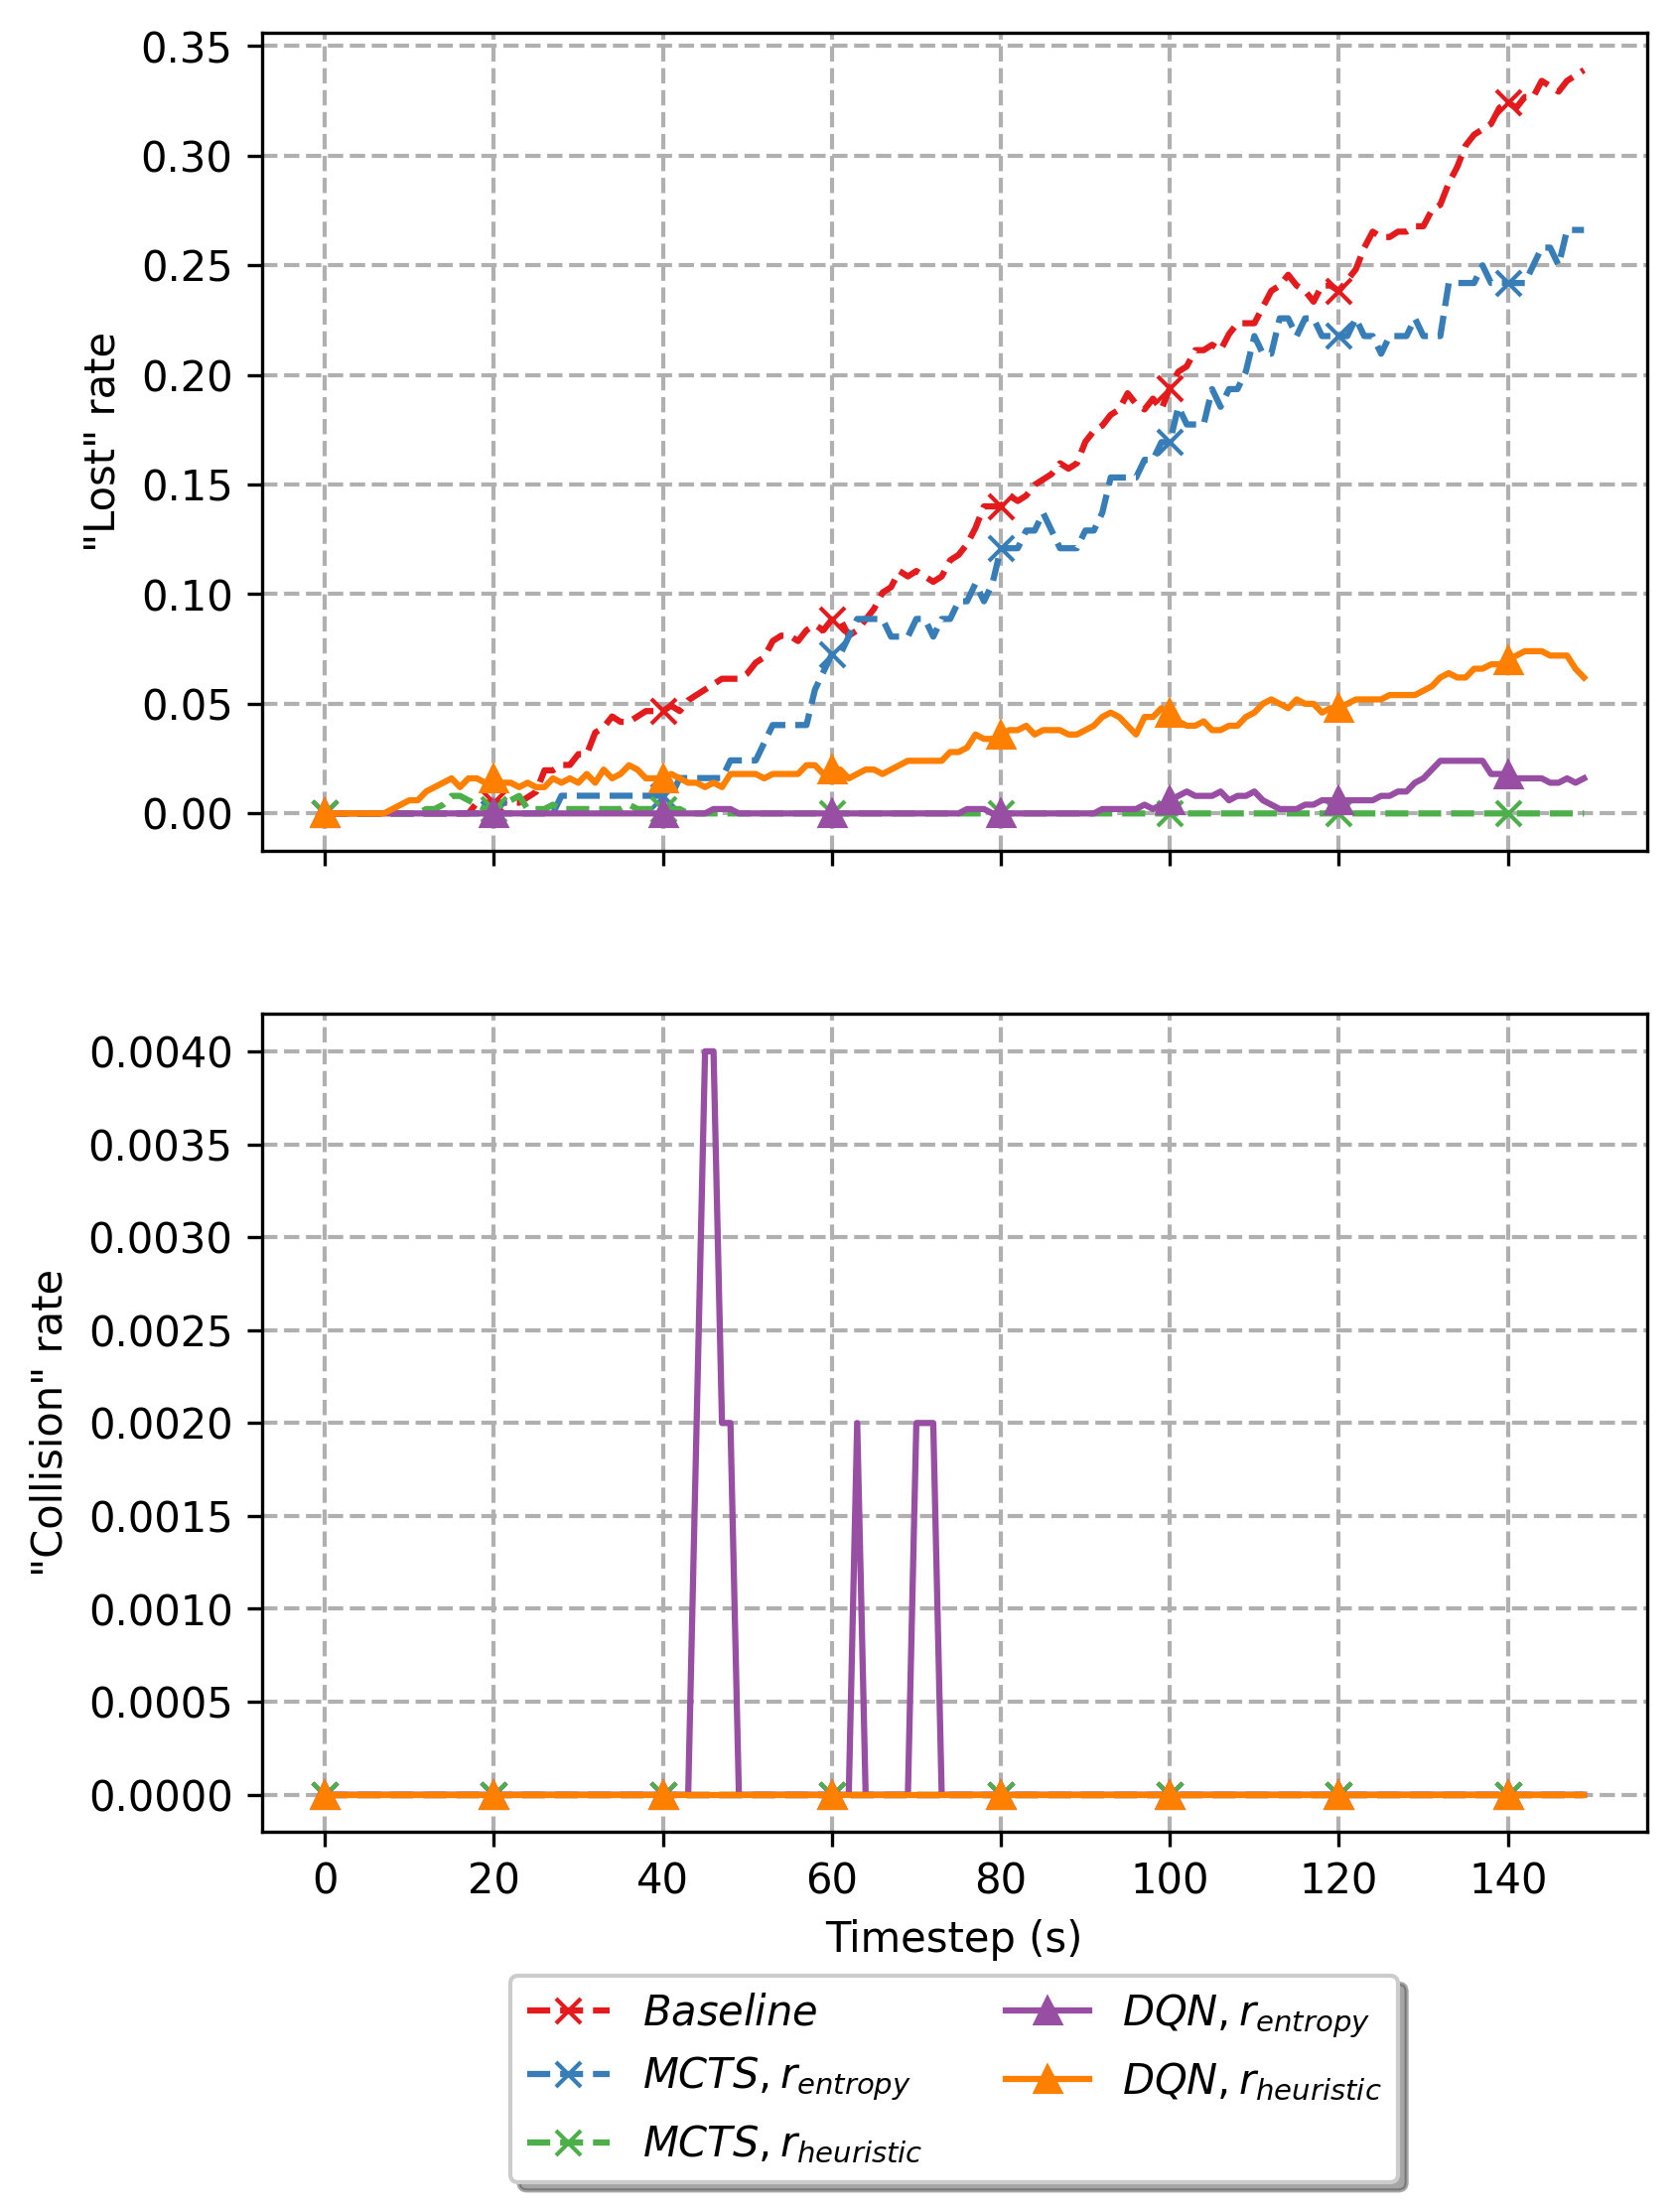

In [72]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':4}
doublerssi_heuristic_metric_comparison(run_filter, cumulative=False )

IndexError: list index out of range

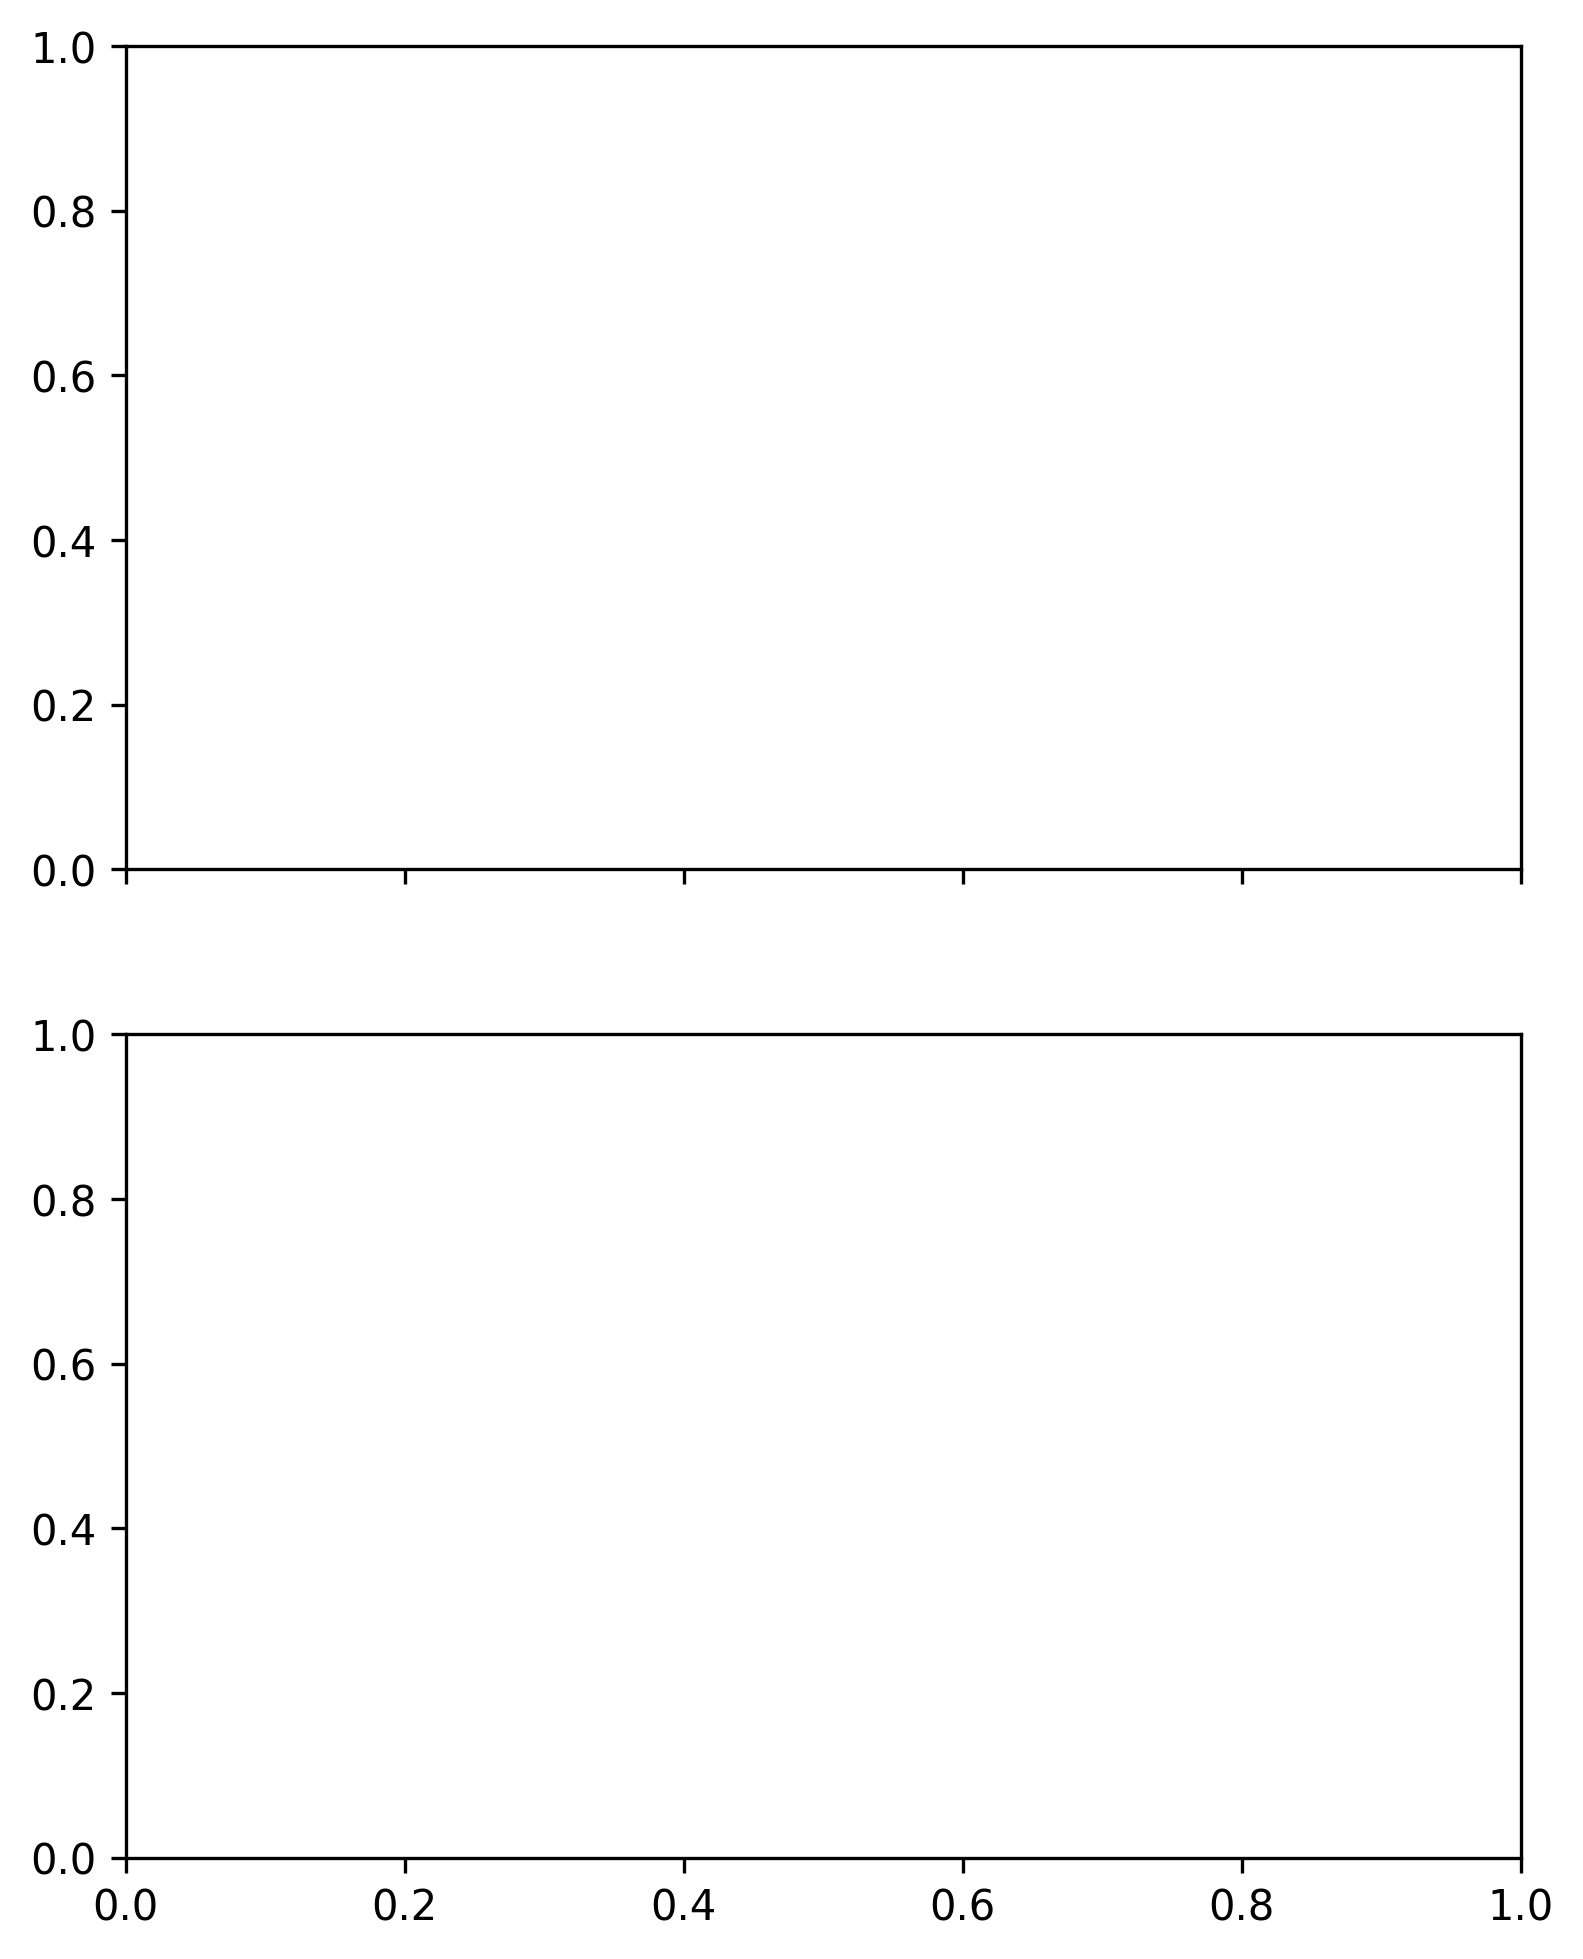

In [39]:
### FIGURE

run_filter = {'sensor': 'doublerssi', 'fading_sigma':4}
doublerssi_heuristic_metric_comparison(run_filter, cumulative=False )

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':2}

doublerssi_reward_comparison(run_filter, 'lost', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':2}

doublerssi_reward_comparison(run_filter, 'lost', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':4}

doublerssi_reward_comparison(run_filter, 'lost', cumulative=False)
doublerssi_reward_comparison(run_filter, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':2, 'reward':'entropy_collision_reward' }
doublerssi_mean_counts_comparison(run_filter, 'lost', cumulative=False)
doublerssi_mean_counts_comparison(run_filter, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':4, 'reward':'entropy_collision_reward' }
doublerssi_mean_counts_comparison(run_filter, 'lost', cumulative=False)
doublerssi_mean_counts_comparison(run_filter, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':2, 'reward':'range_reward' }
doublerssi_mean_counts_comparison(run_filter, 'lost', cumulative=False)
doublerssi_mean_counts_comparison(run_filter, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':4, 'reward':'range_reward' }
doublerssi_mean_counts_comparison(run_filter, 'lost', cumulative=False)
doublerssi_mean_counts_comparison(run_filter, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':8, 'reward':'range_reward' }
doublerssi_mean_counts_comparison(run_filter, 'lost', cumulative=False)
doublerssi_mean_counts_comparison(run_filter, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':4, 'reward':'range_reward' }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
for i,r in enumerate(dqn_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('dqn', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('dqn', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_counts('dqn', r, 'lost')
    doublerssi_mean_counts('dqn', r, 'lost', cumulative=False)
    doublerssi_mean_counts('dqn', r, 'collisions')
    doublerssi_mean_counts('dqn', r, 'collisions', cumulative=False)
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_counts('mcts', r, 'lost')
    doublerssi_mean_counts('mcts', r, 'lost', cumulative=False)
    doublerssi_mean_counts('mcts', r, 'collisions')
    doublerssi_mean_counts('mcts', r, 'collisions', cumulative=False)

In [ ]:
run_filter = {'sensor': 'doublerssi', 'fading_sigma':4, 'reward':'entropy_collision_reward' }
mcts_runs = filter_runs('mcts', run_filter)
mcts_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
dqn_runs = filter_runs('dqn', run_filter)
dqn_runs.sort(key=lambda run_ts: datetime.strptime(run_ts, '%Y-%m-%dT%H:%M:%S'), reverse=True)
for i,r in enumerate(dqn_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('dqn', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('dqn', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_counts('dqn', r, 'lost')
    doublerssi_mean_counts('dqn', r, 'lost', cumulative=False)
    doublerssi_mean_counts('dqn', r, 'collisions')
    doublerssi_mean_counts('dqn', r, 'collisions', cumulative=False)
for i,r in enumerate(mcts_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('mcts', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('mcts', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_counts('mcts', r, 'lost')
    doublerssi_mean_counts('mcts', r, 'lost', cumulative=False)
    doublerssi_mean_counts('mcts', r, 'collisions')
    doublerssi_mean_counts('mcts', r, 'collisions', cumulative=False)

In [ ]:
for i,r in enumerate(dqn_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('dqn', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('dqn', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_metric('dqn', r, 'centroid_err')

In [ ]:
for i,r in enumerate(dqn_runs): 
    print('#{}'.format(i))
    #print(get_config('dqn', r))
    print('reward = ',get_config('dqn', r)['Methods'].get('reward'))
    print('fading_sigma = ',get_config('dqn', r)['Methods'].get('fading_sigma',0))
    doublerssi_mean_metric('dqn', r, 'rmse')

In [ ]:
config = get_config('mcts', mcts_runs[1])
data = get_data('mcts', mcts_runs[1])


n_runs = data.shape[0]
rmse = []
for n in range(n_runs): 
    a = re.split(',', re.sub('[\n]+', ',', data['rmse'][n]))
    b = [re.sub('[\[\]]+', '', aa).strip() for aa in a]
    c = [re.split('\s+', bb) for bb in b ]
    d = [[float(ccc) for ccc in cc] for cc in c]
    #d = np.array(d)
    d = np.mean(d, axis=1)
    
    rmse.append(d)
rmse = np.array(rmse)
# plt.figure()
# plt.plot(d[:,0])
# plt.plot(d[:,1])
# plt.show()

np.array(rmse).shape
plt.figure()
plt.plot(np.mean(rmse, axis=0))
plt.show()

In [ ]:
n_runs = data.shape[0]
lost = []
for n in range(n_runs): 
    a = re.sub('[\n.\[\]]+', '', data['lost'][n])
    b = re.split('\s+', a.strip())
    c = np.array([int(bb) for bb in b])
    lost.append(c)
lost = np.array(lost)
lost = np.mean(lost, axis=0)
plt.figure()
plt.plot(lost)
plt.show()

In [ ]:
a = re.sub('[\n.\[\]]+', '', data['lost'][4])
b = re.split('\s+', a.strip())
c = np.array([int(bb) for bb in b])
c

In [ ]:
a = re.sub('[\n.\[\]]+', '', data['collisions'][10])
b = re.split('\s+', a.strip())
c = np.array([int(bb) for bb in b])
c

In [ ]:
a = re.split(',', re.sub('[\n]+', ',', data['rmse'][0]))
print(a)
b = [re.sub('[\[\]]+', '', aa).strip() for aa in a]
print(b)
c = [re.split('\s+', bb) for bb in b ]
d = [[float(ccc) for ccc in cc] for cc in c]
d = np.array(d)

In [ ]:
data['lost'][0]

In [ ]:
plt.figure()
plt.plot(d[:,0])
plt.plot(d[:,1])
plt.show()

In [ ]:
config = get_config('dqn', dqn_runs[0])
data = get_data('dqn', dqn_runs[0])

n_runs = data.shape[0]
rmse = []
for n in range(n_runs): 
    a = re.split(',', re.sub('[\n]+', ',', data['rmse'][n]))
    b = [re.sub('[\[\]]+', '', aa).strip() for aa in a]
    c = [re.split('\s+', bb) for bb in b ]
    d = [[float(ccc) for ccc in cc] for cc in c]
    #d = np.array(d)
    d = np.mean(d, axis=1)
    
    rmse.append(d)
rmse = np.array(rmse)
# plt.figure()
# plt.plot(d[:,0])
# plt.plot(d[:,1])
# plt.show()

np.array(rmse).shape
plt.figure()
plt.plot(np.mean(rmse, axis=0))
plt.show()

In [ ]:
np.mean(rmse, axis=0).shape

In [ ]:

config = get_config('mcts', runs[0])
data = get_data('mcts', runs[0])

print('Run: {}'.format(runs[0]))
print('\nConfig: ')
pprint.pprint(config)
print('\nLog metrics and state information:')
pprint.pprint(list(data.columns.values))


## Plotting
For convenience we have written a set of plotting functions which plot various metrics in various formats.  
See `birdseye/results.py` for more details on the plotting functions.

## Comparison of MCTS and DQN action policies for various sensor models and reward functions
### Figure 4 from IEEE ROSE 21 paper

In [ ]:
plotter(single_metric_grid, variance_bars=True )

## Localization performance with varying starting positions
### figure 5 from IEEE ROSE 21 paper

In [ ]:
# figure 5
sensors = ['drone', 'signalstrength']
rewards = ['range_reward', 'entropy_collision_reward']

for s in sensors: 
    for r in rewards: 
        config = {'datetime_start': '2021-06-19T00:00:00', 'reward':r, 'sensor':s,  'target_speed':1, 'target_start':['75','100', '125']}
        starting_position_plots(config, limit=3)

## Comparison of range, r, and bearing, θ, errors
### figure 6 from IEEE ROSE 21 paper

In [ ]:
plotter(two_metric_grid, metric1='r_err', metric2='theta_err', limit=2, variance_bars=False)

## Comparison of the belief range and bearing uncertainty (standard deviation) 
### figure 7 from IEEE ROSE 21 paper

In [ ]:
plotter(std_dev_grid, variance_bars=False, y_lim=10, limit=2)

### alternative view of figure 6

In [ ]:
separate_plotter(two_metric_grid ,metric1='r_err', metric2='theta_err', timing=False, variance_bars=True, limit=2)

### alternative view of figure 7

In [ ]:
separate_plotter(std_dev_grid, variance_bars=True, timing=False, y_lim=10, limit=2)